In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense, Activation,LSTM,LeakyReLU,Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error


### read data

In [3]:
bi1=pd.read_excel('bi_1.xlsx')
bi2=pd.read_excel('bi_2.xlsx')
bi3=pd.read_excel('bi_3.xlsx')
bi4=pd.read_excel('bi_4.xlsx')
bi5=pd.read_excel('bi_5.xlsx')
bi6=pd.read_excel('bi_6.xlsx')
bi7=pd.read_excel('bi_7.xlsx')
bi8=pd.read_excel('bi_8.xlsx')
bi9=pd.read_excel('bi_9.xlsx')
bi10=pd.read_excel('bi_10.xlsx')
bi11=pd.read_excel('bi_11.xlsx')
bi12=pd.read_excel('bi_12.xlsx')
bi13=pd.read_excel('bi_13.xlsx')
bi14=pd.read_excel('bi_14.xlsx')
bi15=pd.read_excel('bi_15.xlsx')
bi16=pd.read_excel('bi_16.xlsx')
bi17=pd.read_excel('bi_17.xlsx')
bi18=pd.read_excel('bi_18.xlsx')
bi19=pd.read_excel('bi_19.xlsx')

In [4]:
bi1.head()

,time,eto11,sig11,eto12,sig12
0,0,0.00000,0.000000,0.00000,0.000000
1,1,0.00064,45.780480,0.00032,17.607877
2,2,0.00128,91.560957,0.00064,35.215752
3,3,0.00192,137.337337,0.00096,52.821467
4,4,0.00256,182.661448,0.00128,70.189930


calculate SigmaMAx


In [5]:
bi1['sig_equ']=np.sqrt((bi1['sig11']**2)+(3*(bi1['sig12']**2)))
bi2['sig_equ']=np.sqrt((bi2['sig11']**2)+(3*(bi2['sig12']**2)))
bi3['sig_equ']=np.sqrt((bi3['sig11']**2)+(3*(bi3['sig12']**2)))
bi4['sig_equ']=np.sqrt((bi4['sig11']**2)+(3*(bi4['sig12']**2)))
bi5['sig_equ']=np.sqrt((bi5['sig11']**2)+(3*(bi5['sig12']**2)))
bi6['sig_equ']=np.sqrt((bi6['sig11']**2)+(3*(bi6['sig12']**2)))
bi7['sig_equ']=np.sqrt((bi7['sig11']**2)+(3*(bi7['sig12']**2)))
bi8['sig_equ']=np.sqrt((bi8['sig11']**2)+(3*(bi8['sig12']**2)))
bi9['sig_equ']=np.sqrt((bi9['sig11']**2)+(3*(bi9['sig12']**2)))
bi10['sig_equ']=np.sqrt((bi10['sig11']**2)+(3*(bi10['sig12']**2)))
bi11['sig_equ']=np.sqrt((bi11['sig11']**2)+(3*(bi11['sig12']**2)))
bi12['sig_equ']=np.sqrt((bi12['sig11']**2)+(3*(bi12['sig12']**2)))
bi13['sig_equ']=np.sqrt((bi13['sig11']**2)+(3*(bi13['sig12']**2)))
bi14['sig_equ']=np.sqrt((bi14['sig11']**2)+(3*(bi14['sig12']**2)))
bi15['sig_equ']=np.sqrt((bi15['sig11']**2)+(3*(bi15['sig12']**2)))
bi16['sig_equ']=np.sqrt((bi16['sig11']**2)+(3*(bi16['sig12']**2)))
bi17['sig_equ']=np.sqrt((bi17['sig11']**2)+(3*(bi17['sig12']**2)))
bi18['sig_equ']=np.sqrt((bi18['sig11']**2)+(3*(bi18['sig12']**2)))
bi19['sig_equ']=np.sqrt((bi19['sig11']**2)+(3*(bi19['sig12']**2)))


### Data Preprocessing

In [6]:
bi1.head()


,time,eto11,sig11,eto12,sig12,sig_equ
0,0,0.00000,0.000000,0.00000,0.000000,0.000000
1,1,0.00064,45.780480,0.00032,17.607877,55.008766
2,2,0.00128,91.560957,0.00064,35.215752,110.017527
3,3,0.00192,137.337337,0.00096,52.821467,165.020806
4,4,0.00256,182.661448,0.00128,70.189930,219.419879


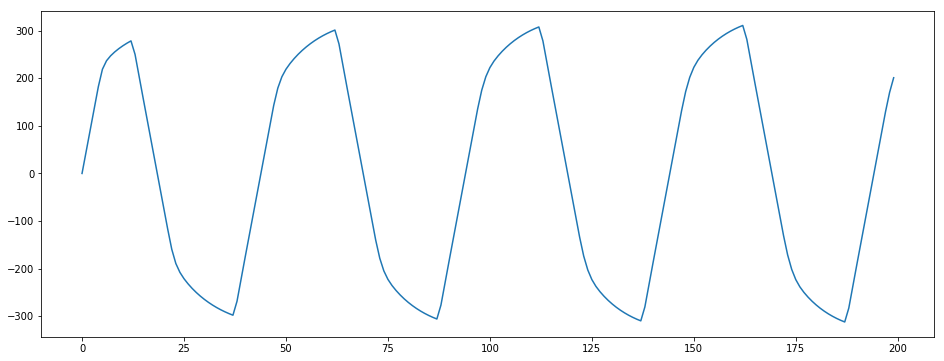

In [7]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi1['time'].head(200),bi1['sig11'].head(200))


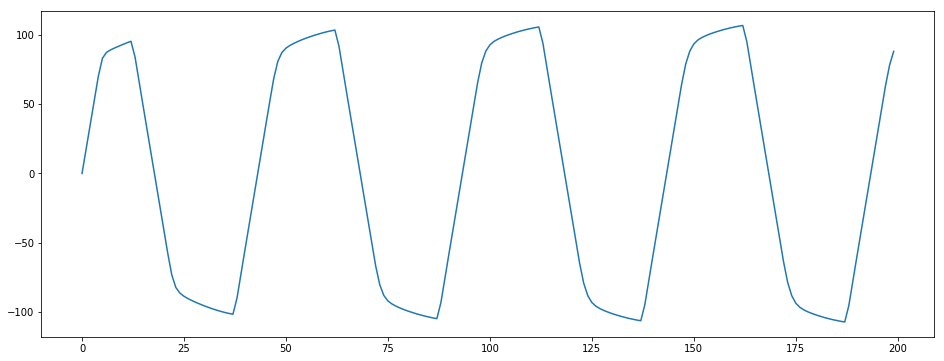

In [8]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi1['time'].head(200),bi1['sig12'].head(200))


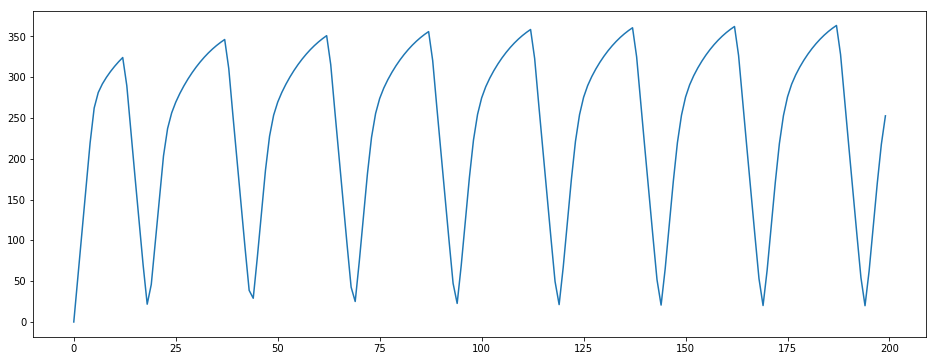

In [9]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi1['time'].head(200),bi1['sig_equ'].head(200))


In [10]:
bi1['sig_max']=0
bi1['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi1)-1):
  if bi1.iloc[i,5]>bi1.iloc[i+1,5] and bi1.iloc[i,5] > bi1.iloc[i-1,5] and bi1.iloc[i,5] > 0 and (bi1.iloc[i,0]-time)>=30 :
    count+=1
    time=bi1.iloc[i,0]
    bi1.iloc[i,6]=1
    bi1.iloc[i,7]=count

In [11]:
bi1.head()

,time,eto11,sig11,eto12,sig12,sig_equ,sig_max,number_of _cycle
0,0,0.00000,0.000000,0.00000,0.000000,0.000000,0,0
1,1,0.00064,45.780480,0.00032,17.607877,55.008766,0,0
2,2,0.00128,91.560957,0.00064,35.215752,110.017527,0,0
3,3,0.00192,137.337337,0.00096,52.821467,165.020806,0,0
4,4,0.00256,182.661448,0.00128,70.189930,219.419879,0,0


In [12]:
new_bi1=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi1)):
  if bi1.iloc[i,6]==1:
    new_bi1.loc[i,'Time']=bi1.iloc[i,0]
    new_bi1.loc[i,'eto11']=bi1.iloc[i,1]
    new_bi1.loc[i,'sig11']=bi1.iloc[i,2]
    new_bi1.loc[i,'eto12']=bi1.iloc[i,3]
    new_bi1.loc[i,'sig12']=bi1.iloc[i,4]
    new_bi1.loc[i,'sig_eq']=bi1.iloc[i,5]
    new_bi1.loc[i,'number_of_cycle']=bi1.iloc[i,7]

In [13]:
new_bi1.head()

,Time,number_of_cycle,eto11,sig11,eto12,sig12,sig_eq
37,37,1,-0.00768006,-298.251,-0.00384003,-101.558,346.26
87,87,2,-0.00767973,-306.261,-0.00383987,-104.732,355.953
137,137,3,-0.00768012,-310.165,-0.00384006,-106.255,360.656
187,187,4,-0.00767989,-312.52,-0.00383995,-107.143,363.466
237,237,5,-0.00767974,-314.143,-0.00383987,-107.739,365.389


Text(0,0.5,'Sigma Max ')

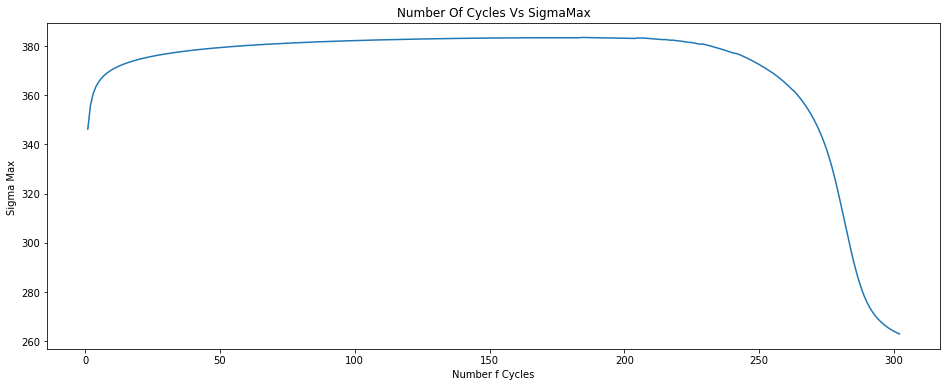

In [14]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi1['number_of_cycle'],new_bi1['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

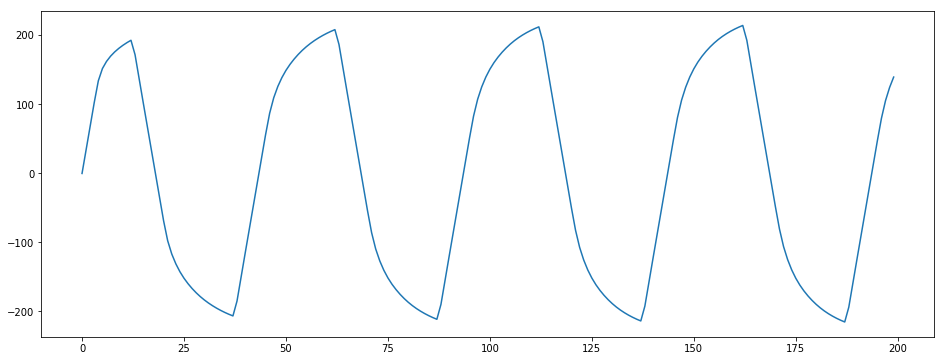

In [15]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi2['time'].head(200),bi2['sig11'].head(200))

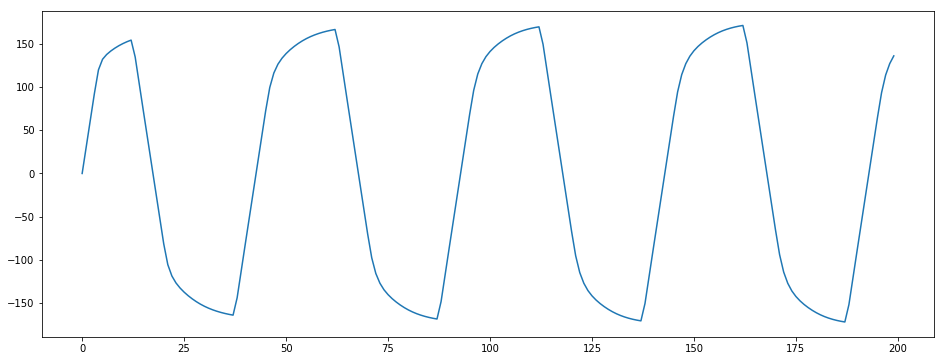

In [16]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi2['time'].head(200),bi2['sig12'].head(200))

In [17]:
bi2['sig_max']=0
bi2['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi2)-1):
  if bi2.iloc[i,5]>bi2.iloc[i+1,5] and bi2.iloc[i,5] > bi2.iloc[i-1,5] and bi2.iloc[i,5] > 0 and (bi2.iloc[i,0]-time)>=30 :
    count+=1
    time=bi2.iloc[i,0]
    bi2.iloc[i,6]=1
    bi2.iloc[i,7]=count
    
print(bi2.head())

   time    eto11       sig11    eto12       sig12     sig_equ  sig_max  \
0     0  0.00000    0.000000  0.00000    0.000000    0.000000        0   
1     1  0.00048   34.335360  0.00056   30.813785   63.461681        0   
2     2  0.00096   68.670676  0.00112   61.627517  126.923262        0   
3     3  0.00144  102.966448  0.00168   92.394661  190.295585        0   
4     4  0.00192  134.337502  0.00224  119.757565  247.127877        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [18]:
new_bi2=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi2)):
  if bi2.iloc[i,6]==1:
    new_bi2.loc[i,'Time']=bi2.iloc[i,0]
    new_bi2.loc[i,'eto11']=bi2.iloc[i,1]
    new_bi2.loc[i,'sig11']=bi2.iloc[i,2]
    new_bi2.loc[i,'eto12']=bi2.iloc[i,3]
    new_bi2.loc[i,'sig12']=bi2.iloc[i,4]
    new_bi2.loc[i,'sig_eq']=bi2.iloc[i,5]
    new_bi2.loc[i,'number_of_cycle']=bi2.iloc[i,7]
    
    
print(new_bi2.head())

    Time number_of_cycle       eto11    sig11       eto12    sig12   sig_eq
37    37               1    -0.00576 -206.411    -0.00672 -163.665  350.662
87    87               2 -0.00576005 -211.281 -0.00672006 -168.133  359.785
137  137               3 -0.00575988 -213.686 -0.00671986 -170.275  364.202
187  187               4 -0.00575984 -215.182 -0.00671981 -171.569  366.894
237  237               5 -0.00575976 -216.236 -0.00671972 -172.469  368.775


Text(0,0.5,'Sigma Max ')

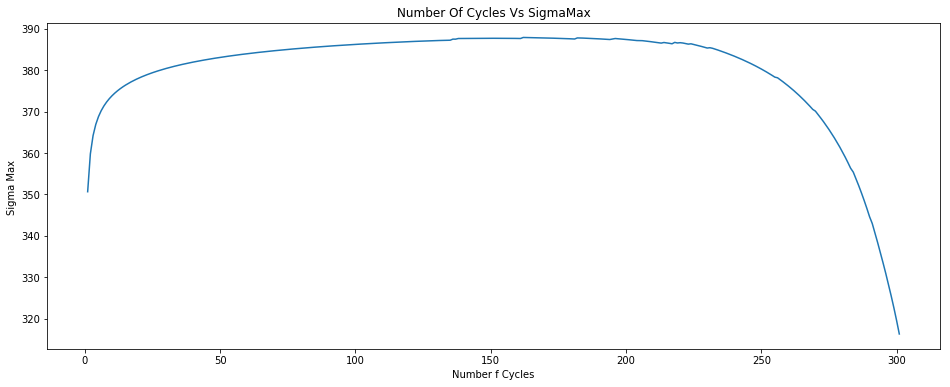

In [19]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi2['number_of_cycle'],new_bi2['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

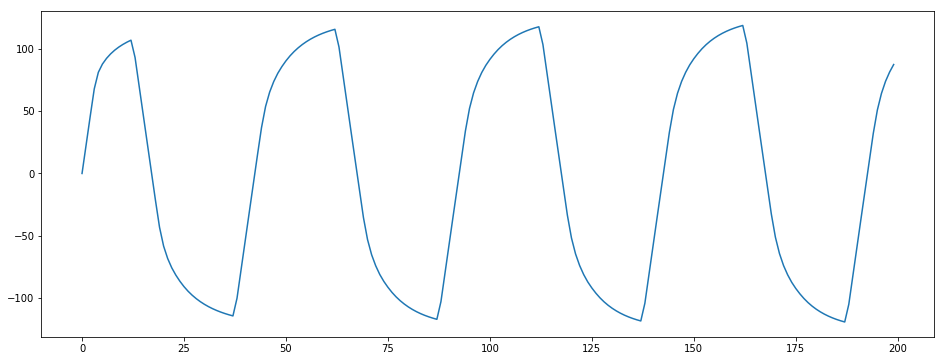

In [20]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi3['time'].head(200),bi3['sig11'].head(200))

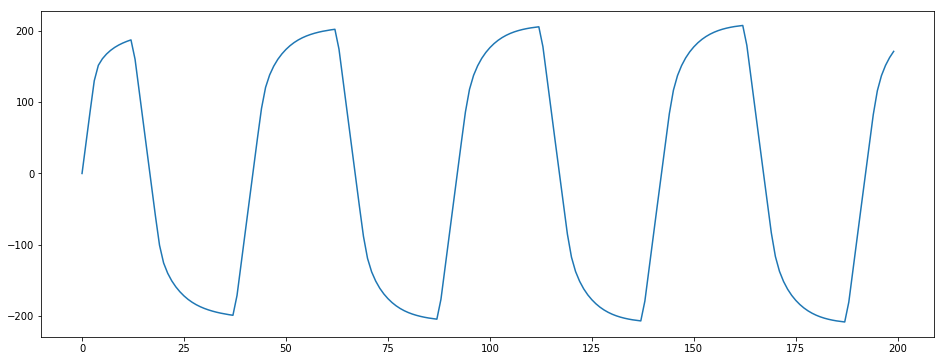

In [21]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi3['time'].head(200),bi3['sig12'].head(200))

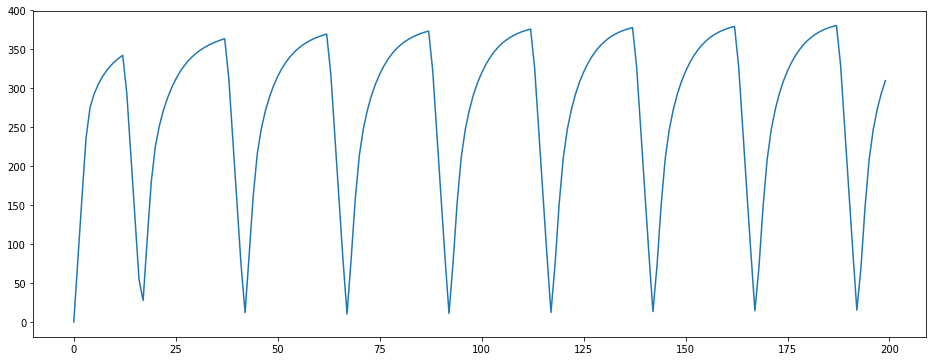

In [22]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi3['time'].head(200),bi3['sig_equ'].head(200))

In [23]:
bi3['sig_max']=0
bi3['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi3)-1):
  if bi3.iloc[i,5]>bi3.iloc[i+1,5] and bi3.iloc[i,5] > bi3.iloc[i-1,5] and bi3.iloc[i,5] > 0 and (bi3.iloc[i,0]-time)>=30 :
    count+=1
    time=bi3.iloc[i,0]
    bi3.iloc[i,6]=1
    bi3.iloc[i,7]=count
    
print(bi3.head())

   time    eto11      sig11   eto12       sig12     sig_equ  sig_max  \
0     0  0.00000   0.000000  0.0000    0.000000    0.000000        0   
1     1  0.00032  22.890249  0.0008   44.019715   79.606340        0   
2     2  0.00064  45.779429  0.0016   88.036786  159.207987        0   
3     3  0.00096  67.983621  0.0024  130.372832  235.824085        0   
4     4  0.00128  81.260635  0.0032  152.059345  275.625513        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [24]:
new_bi3=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi3)):
  if bi3.iloc[i,6]==1:
    new_bi3.loc[i,'Time']=bi3.iloc[i,0]
    new_bi3.loc[i,'eto11']=bi3.iloc[i,1]
    new_bi3.loc[i,'sig11']=bi3.iloc[i,2]
    new_bi3.loc[i,'eto12']=bi3.iloc[i,3]
    new_bi3.loc[i,'sig12']=bi3.iloc[i,4]
    new_bi3.loc[i,'sig_eq']=bi3.iloc[i,5]
    new_bi3.loc[i,'number_of_cycle']=bi3.iloc[i,7]
    
    
print(new_bi3.head())

    Time number_of_cycle       eto11    sig11       eto12    sig12   sig_eq
37    37               1 -0.00384008 -114.402 -0.00960019 -199.319  363.692
87    87               2 -0.00383998 -117.122 -0.00959994 -204.786  373.536
137  137               3 -0.00383997 -118.447 -0.00959992 -207.241   377.99
187  187               4    -0.00384 -119.268     -0.0096 -208.738   380.71
237  237               5 -0.00383997 -119.846 -0.00959992 -209.802   382.64


Text(0,0.5,'Sigma Max ')

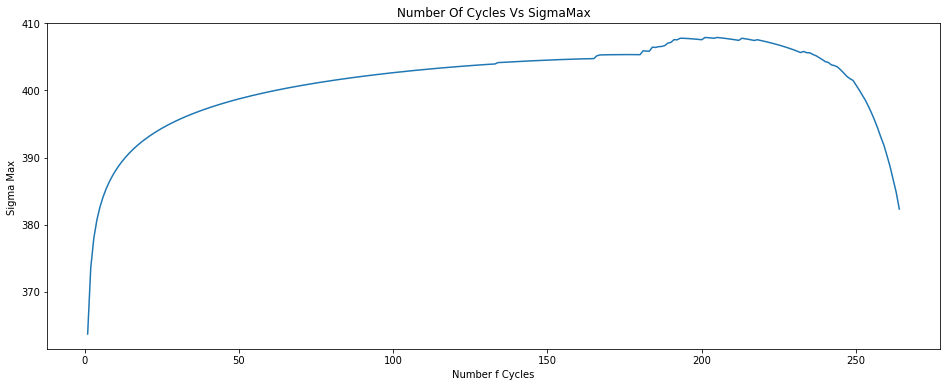

In [25]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi3['number_of_cycle'],new_bi3['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

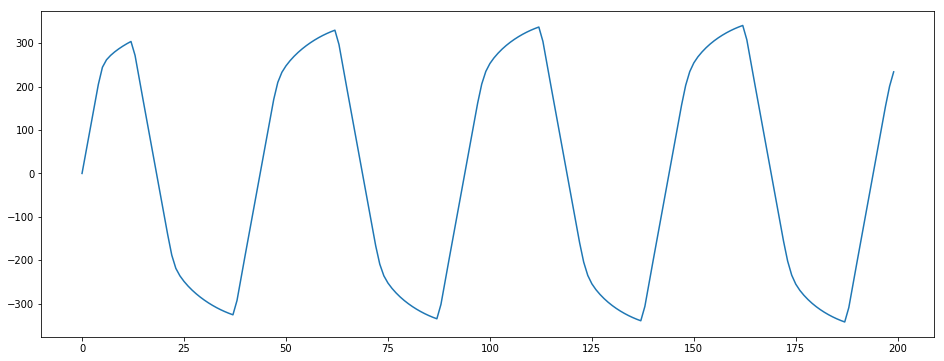

In [26]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi4['time'].head(200),bi4['sig11'].head(200))

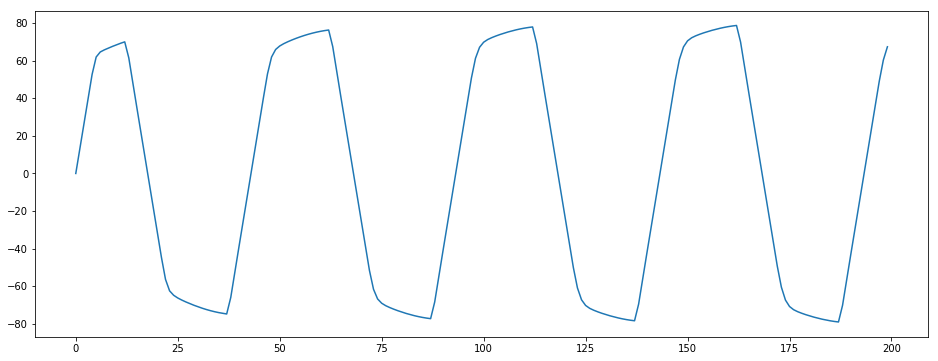

In [27]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi4['time'].head(200),bi4['sig12'].head(200))

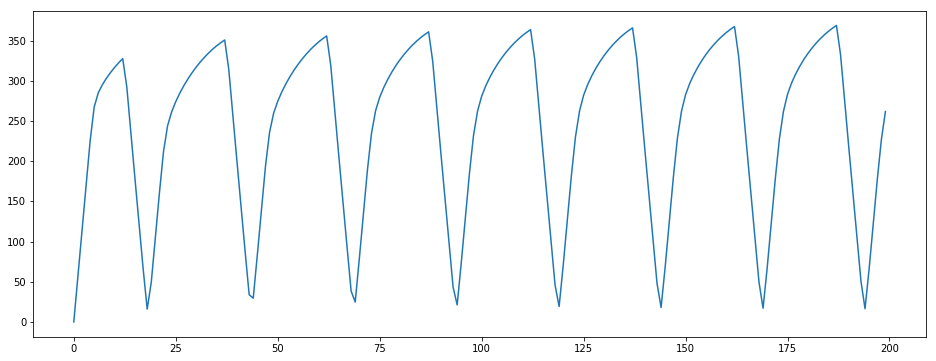

In [28]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi4['time'].head(200),bi4['sig_equ'].head(200))

In [29]:
bi4['sig_max']=0
bi4['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi4)-1):
  if bi4.iloc[i,5]>bi4.iloc[i+1,5] and bi4.iloc[i,5] > bi4.iloc[i-1,5] and bi4.iloc[i,5] > 0 and (bi4.iloc[i,0]-time)>=30 :
    count+=1
    time=bi4.iloc[i,0]
    bi4.iloc[i,6]=1
    bi4.iloc[i,7]=count
    
print(bi4.head())

   time    eto11       sig11    eto12      sig12     sig_equ  sig_max  \
0     0  0.00000    0.000000  0.00000   0.000000    0.000000        0   
1     1  0.00072   51.503040  0.00024  13.205907   56.353803        0   
2     2  0.00144  103.006075  0.00048  26.411813  112.707600        0   
3     3  0.00216  154.503534  0.00072  39.615831  169.054974        0   
4     4  0.00288  205.387806  0.00096  52.613180  224.696665        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [30]:
new_bi4=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi4)):
  if bi4.iloc[i,6]==1:
    new_bi4.loc[i,'Time']=bi4.iloc[i,0]
    new_bi4.loc[i,'eto11']=bi4.iloc[i,1]
    new_bi4.loc[i,'sig11']=bi4.iloc[i,2]
    new_bi4.loc[i,'eto12']=bi4.iloc[i,3]
    new_bi4.loc[i,'sig12']=bi4.iloc[i,4]
    new_bi4.loc[i,'sig_eq']=bi4.iloc[i,5]
    new_bi4.loc[i,'number_of_cycle']=bi4.iloc[i,7]
    
    
print(new_bi4.head())

    Time number_of_cycle       eto11    sig11       eto12    sig12   sig_eq
37    37               1 -0.00863994 -326.035 -0.00287998  -74.646  350.735
87    87               2 -0.00864016  -335.21 -0.00288005 -77.1285  360.849
137  137               3 -0.00864024 -339.769 -0.00288008 -78.2486  365.803
187  187               4  -0.0086402  -342.55 -0.00288007 -78.8901  368.797
237  237               5 -0.00864071 -344.476 -0.00288024 -79.3187  370.861


Text(0,0.5,'Sigma Max ')

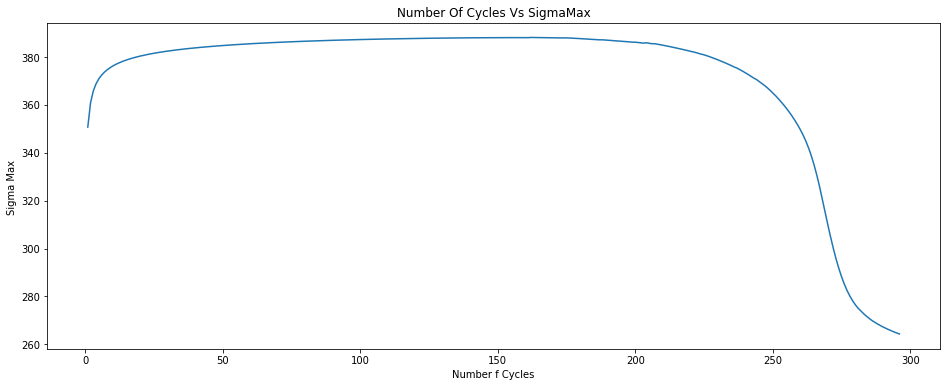

In [31]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi4['number_of_cycle'],new_bi4['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

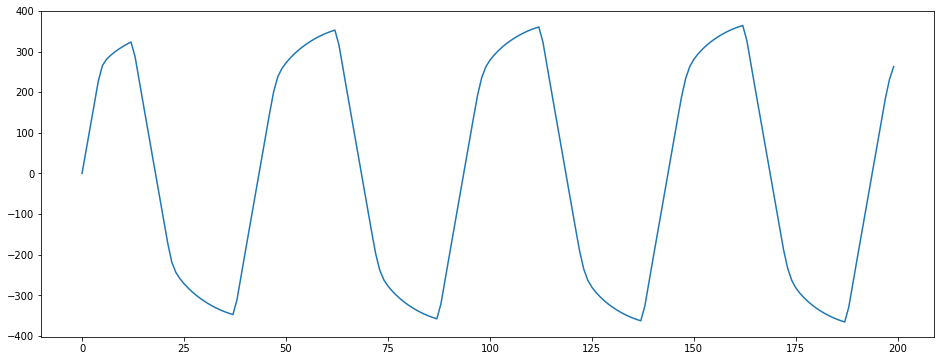

In [32]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi5['time'].head(200),bi5['sig11'].head(200))


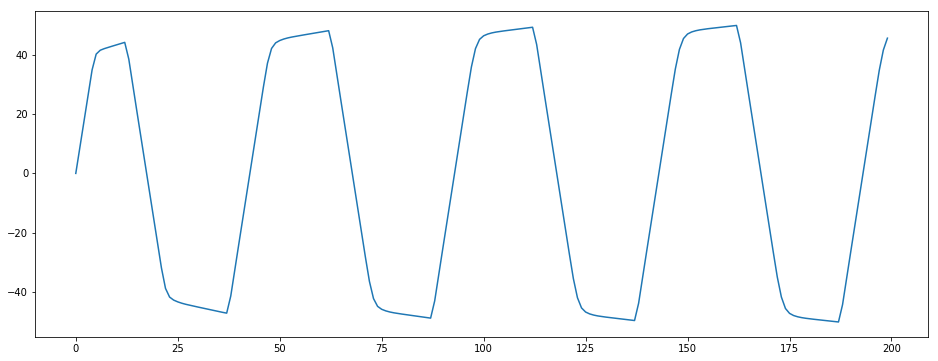

In [33]:

f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi5['time'].head(200),bi5['sig12'].head(200))

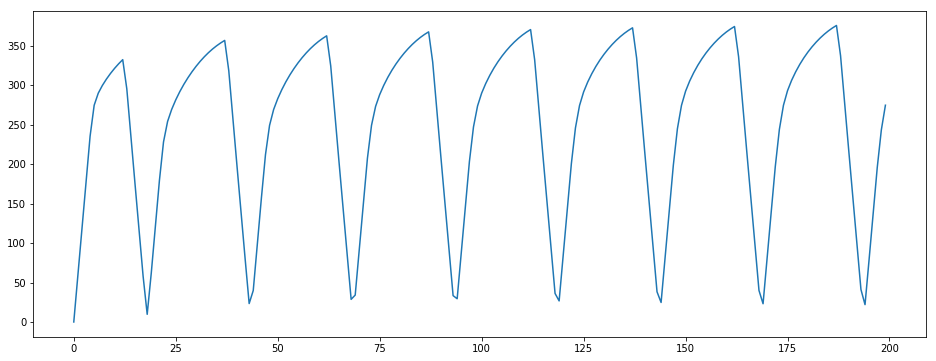

In [34]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi5['time'].head(200),bi5['sig_equ'].head(200))

In [35]:

bi5['sig_max']=0
bi5['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi5)-1):
  if bi5.iloc[i,5]>bi5.iloc[i+1,5] and bi5.iloc[i,5] > bi5.iloc[i-1,5] and bi5.iloc[i,5] > 0 and (bi5.iloc[i,0]-time)>=30 :
    count+=1
    time=bi5.iloc[i,0]
    bi5.iloc[i,6]=1
    bi5.iloc[i,7]=count
    
print(bi5.head())

   time   eto11       sig11    eto12      sig12     sig_equ  sig_max  \
0     0  0.0000    0.000000  0.00000   0.000000    0.000000        0   
1     1  0.0008   57.225600  0.00016   8.803938   59.222439        0   
2     2  0.0016  114.451189  0.00032  17.607875  118.444866        0   
3     3  0.0024  171.664635  0.00048  26.409590  177.654570        0   
4     4  0.0032  227.603339  0.00064  34.978385  235.528644        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [36]:
new_bi5=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi5)):
  if bi5.iloc[i,6]==1:
    new_bi5.loc[i,'Time']=bi5.iloc[i,0]
    new_bi5.loc[i,'eto11']=bi5.iloc[i,1]
    new_bi5.loc[i,'sig11']=bi5.iloc[i,2]
    new_bi5.loc[i,'eto12']=bi5.iloc[i,3]
    new_bi5.loc[i,'sig12']=bi5.iloc[i,4]
    new_bi5.loc[i,'sig_eq']=bi5.iloc[i,5]
    new_bi5.loc[i,'number_of_cycle']=bi5.iloc[i,7]
    
    
print(new_bi5.head())

    Time number_of_cycle       eto11    sig11       eto12    sig12   sig_eq
37    37               1 -0.00960018 -347.371 -0.00192004 -47.2094  356.865
87    87               2 -0.00960013 -357.815 -0.00192003 -48.8943    367.7
137  137               3 -0.00959998 -362.737    -0.00192   -49.71  372.816
187  187               4 -0.00959964 -365.611 -0.00191993 -50.1988  375.807
237  237               5 -0.00959993 -367.532 -0.00191999 -50.5343  377.811


Text(0,0.5,'Sigma Max ')

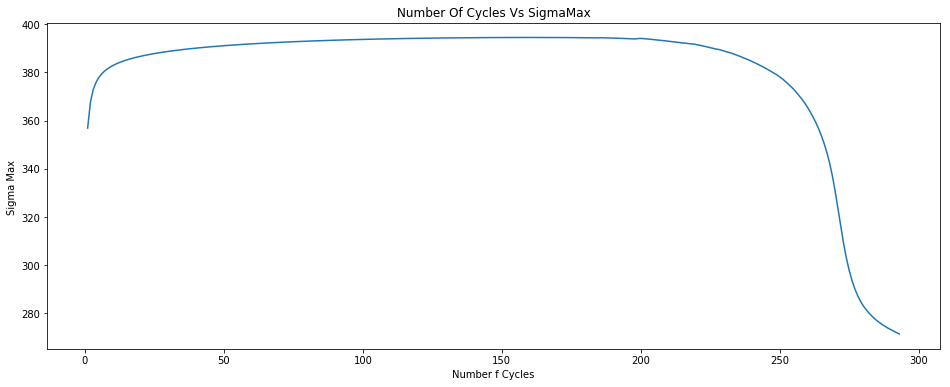

In [37]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi5['number_of_cycle'],new_bi5['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

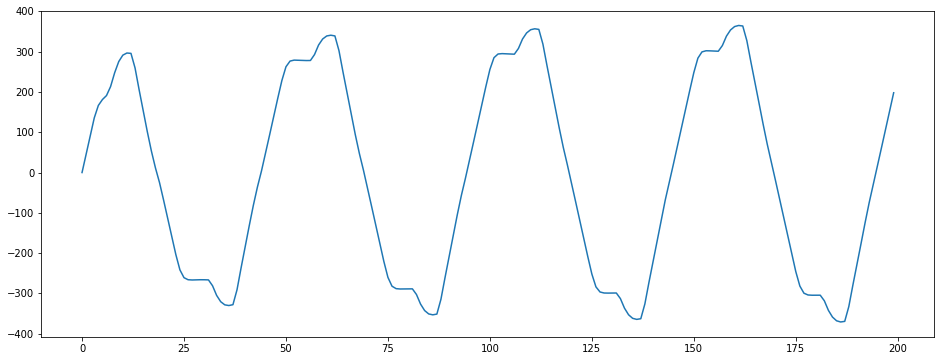

In [38]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi6['time'].head(200),bi6['sig11'].head(200))



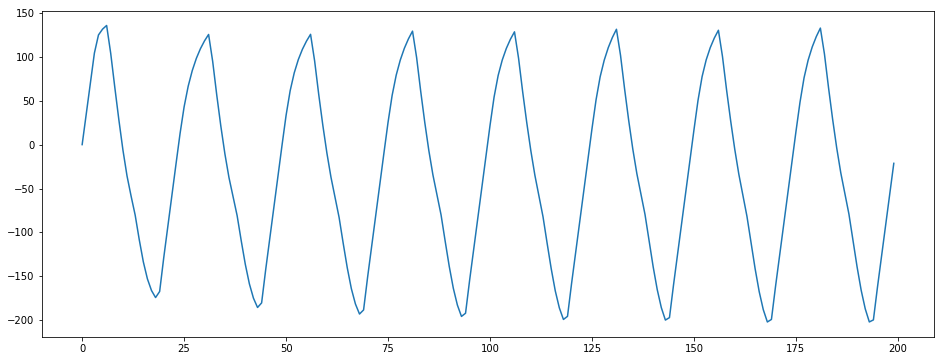

In [39]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi6['time'].head(200),bi6['sig12'].head(200))

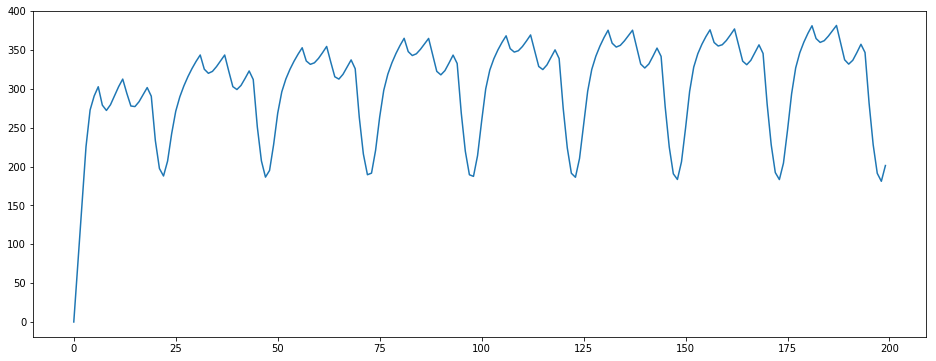

In [40]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi6['time'].head(200),bi6['sig_equ'].head(200))


In [41]:
bi6['sig_max']=0
bi6['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi6)-1):
  if bi6.iloc[i,5]>bi6.iloc[i+1,5] and bi6.iloc[i,5] > bi6.iloc[i-1,5] and bi6.iloc[i,5] > 0 and (bi6.iloc[i,0]-time)>=40 :
    count+=1
    time=bi6.iloc[i,0]
    bi6.iloc[i,6]=1
    bi6.iloc[i,7]=count
    
print(bi6.head())

   time     eto11       sig11     eto12       sig12     sig_equ  sig_max  \
0     0  0.000000    0.000000  0.000000    0.000000    0.000000        0   
1     1  0.000635   45.417149  0.000635   34.936270   75.659410        0   
2     2  0.001270   90.833530  0.001270   69.871755  151.317272        0   
3     3  0.001905  135.678221  0.001905  104.226316  225.827267        0   
4     4  0.002540  166.555367  0.002540  124.864967  272.973388        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [42]:
new_bi6=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi6)):
  if bi6.iloc[i,6]==1:
    new_bi6.loc[i,'Time']=bi6.iloc[i,0]
    new_bi6.loc[i,'eto11']=bi6.iloc[i,1]
    new_bi6.loc[i,'sig11']=bi6.iloc[i,2]
    new_bi6.loc[i,'eto12']=bi6.iloc[i,3]
    new_bi6.loc[i,'sig12']=bi6.iloc[i,4]
    new_bi6.loc[i,'sig_eq']=bi6.iloc[i,5]
    new_bi6.loc[i,'number_of_cycle']=bi6.iloc[i,7]
    
    
print(new_bi6.head())

    Time number_of_cycle       eto11    sig11        eto12    sig12   sig_eq
43    43               1 -0.00450808 -36.1022  -0.00349197  -185.46  323.248
87    87               2 -0.00767747 -351.342  0.000322829 -57.4182  365.147
131  131               3 -0.00380803 -298.998   0.00380833  131.351  375.711
181  181               4 -0.00380782 -304.456   0.00380828  132.704  381.477
231  231               5  -0.0038077  -307.79   0.00380824  133.624  385.099


Text(0,0.5,'Sigma Max ')

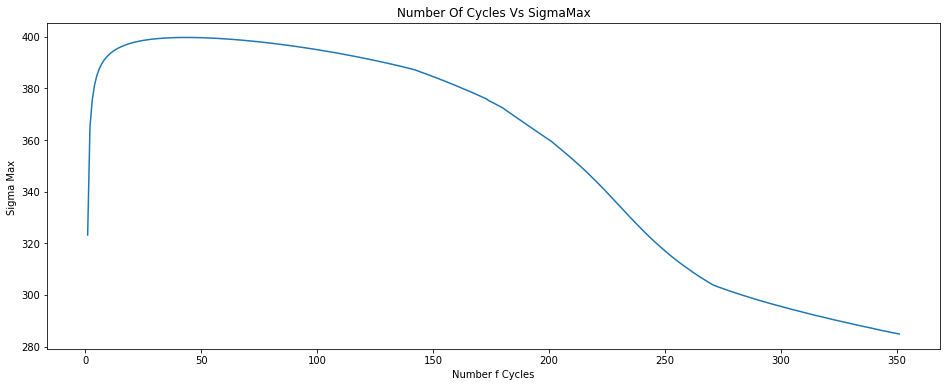

In [43]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi6['number_of_cycle'],new_bi6['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

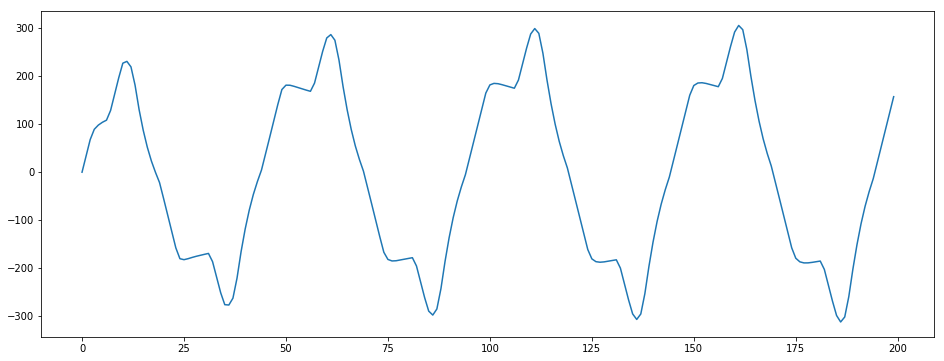

In [44]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi7['time'].head(200),bi7['sig11'].head(200))

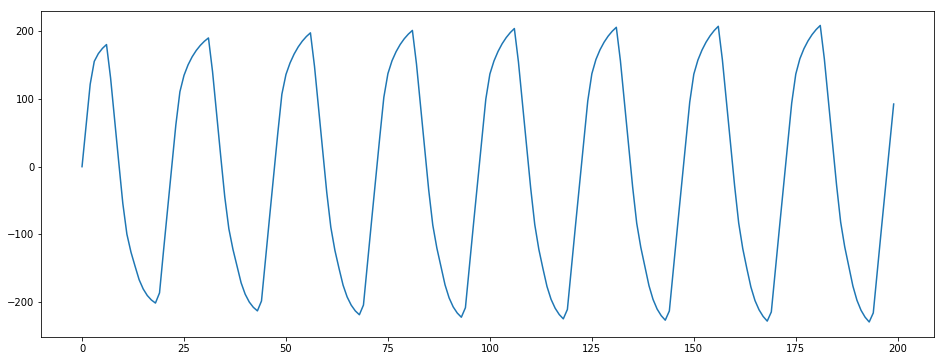

In [45]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi7['time'].head(200),bi7['sig12'].head(200))

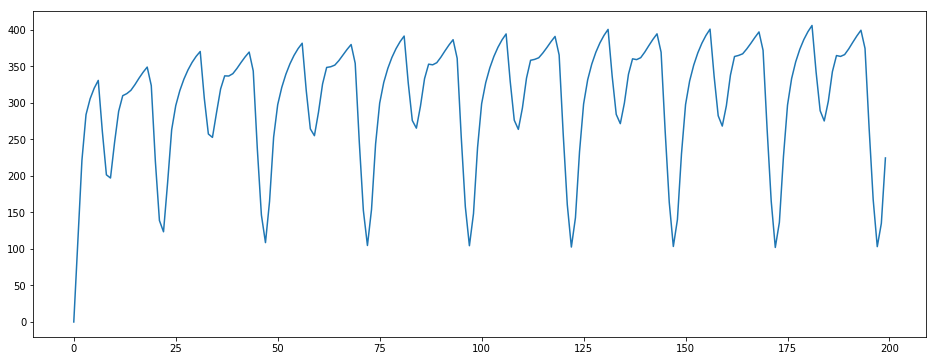

In [46]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi7['time'].head(200),bi7['sig_equ'].head(200))

In [47]:

bi7['sig_max']=0
bi7['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi7)-1):
  if bi7.iloc[i,5]>bi7.iloc[i+1,5] and bi7.iloc[i,5] > bi7.iloc[i-1,5] and bi7.iloc[i,5] > 0 and (bi7.iloc[i,0]-time)>=40 :
    count+=1
    time=bi7.iloc[i,0]
    bi7.iloc[i,6]=1
    bi7.iloc[i,7]=count
    
print(bi7.head())

   time     eto11      sig11     eto12       sig12     sig_equ  sig_max  \
0     0  0.000000   0.000000  0.000000    0.000000    0.000000        0   
1     1  0.000476  34.062856  0.001111   61.138459  111.238534        0   
2     2  0.000952  67.938732  0.002222  121.847097  221.711111        0   
3     3  0.001429  89.401409  0.003333  155.672207  284.067104        0   
4     4  0.001905  98.247133  0.004444  167.110087  305.662956        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [48]:
new_bi7=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi7)):
  if bi7.iloc[i,6]==1:
    new_bi7.loc[i,'Time']=bi7.iloc[i,0]
    new_bi7.loc[i,'eto11']=bi7.iloc[i,1]
    new_bi7.loc[i,'sig11']=bi7.iloc[i,2]
    new_bi7.loc[i,'eto12']=bi7.iloc[i,3]
    new_bi7.loc[i,'sig12']=bi7.iloc[i,4]
    new_bi7.loc[i,'sig_eq']=bi7.iloc[i,5]
    new_bi7.loc[i,'number_of_cycle']=bi7.iloc[i,7]
    
    
print(new_bi7.head())

    Time number_of_cycle       eto11    sig11        eto12    sig12   sig_eq
43    43               1 -0.00338076 -19.4287  -0.00611115 -213.169  369.731
87    87               2 -0.00575813 -285.088  0.000564625  -120.35  353.168
131  131               3 -0.00285605 -182.582   0.00666435  206.008  400.817
181  181               4 -0.00285598 -185.206   0.00666442  208.723  406.198
231  231               5 -0.00285607 -186.985   0.00666451  210.577  409.867


Text(0,0.5,'Sigma Max ')

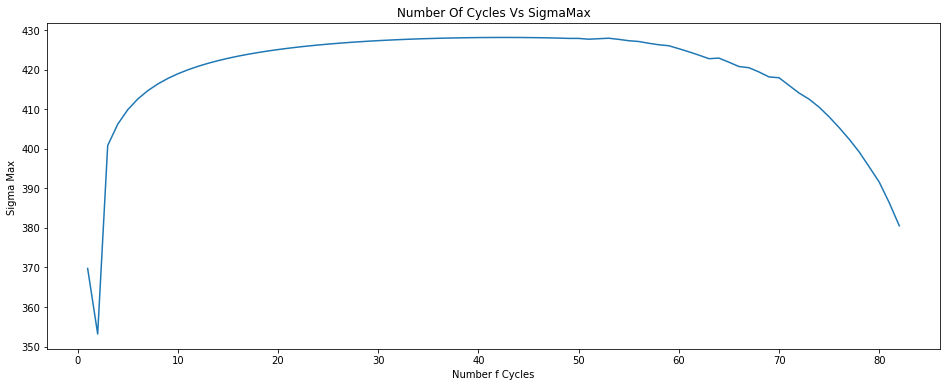

In [49]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi7['number_of_cycle'],new_bi7['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

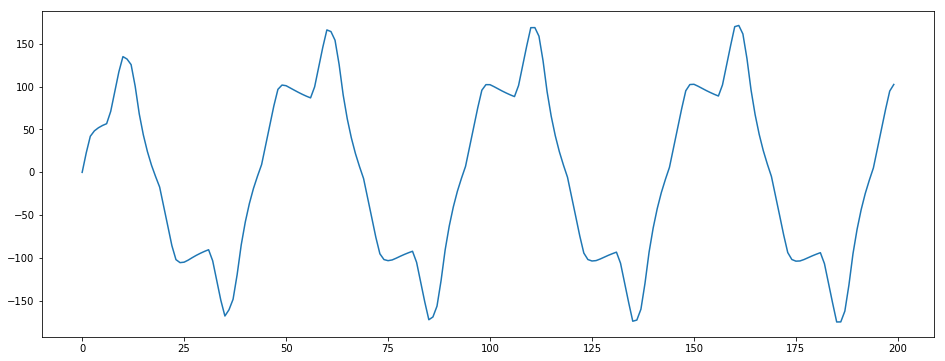

In [50]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi8['time'].head(200),bi8['sig11'].head(200))


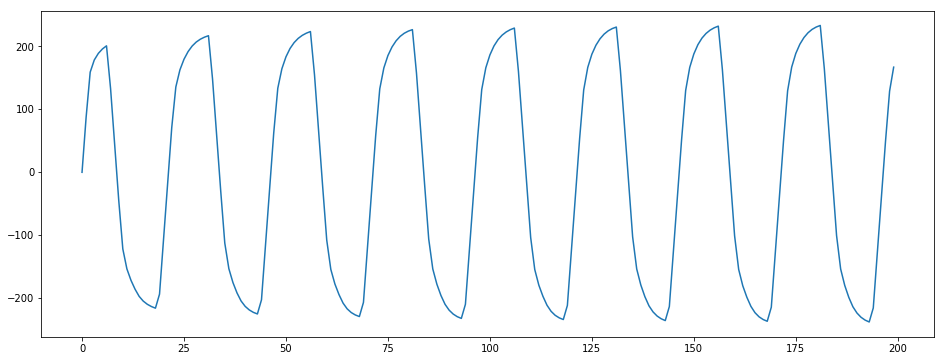

In [51]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi8['time'].head(200),bi8['sig12'].head(200))

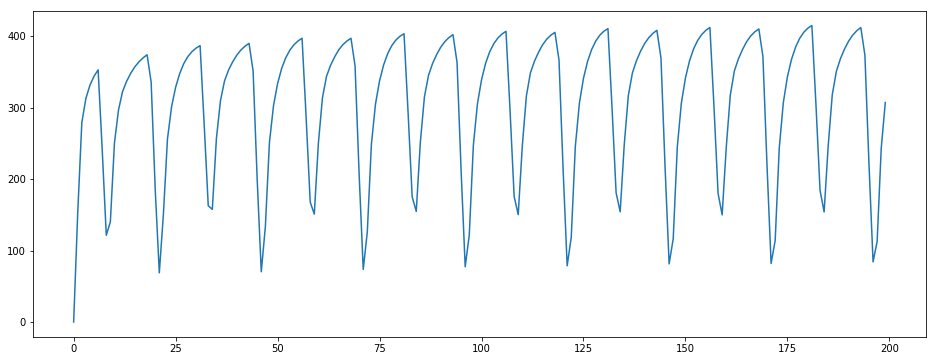

In [52]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi8['time'].head(200),bi8['sig_equ'].head(200))


In [53]:

bi8['sig_max']=0
bi8['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi8)-1):
  if bi8.iloc[i,5]>bi8.iloc[i+1,5] and bi8.iloc[i,5] > bi8.iloc[i-1,5] and bi8.iloc[i,5] > 0 and (bi8.iloc[i,0]-time)>=40 :
    count+=1
    time=bi8.iloc[i,0]
    bi8.iloc[i,6]=1
    bi8.iloc[i,7]=count
    
print(bi8.head())

   time     eto11      sig11     eto12       sig12     sig_equ  sig_max  \
0     0  0.000000   0.000000  0.000000    0.000000    0.000000        0   
1     1  0.000317  22.708424  0.001587   87.339908  152.972059        0   
2     2  0.000635  42.078514  0.003175  159.191953  278.920840        0   
3     3  0.000952  48.389419  0.004762  178.500741  312.936222        0   
4     4  0.001270  52.021538  0.006349  189.031434  331.519064        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [54]:

new_bi8=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi8)):
  if bi8.iloc[i,6]==1:
    new_bi8.loc[i,'Time']=bi8.iloc[i,0]
    new_bi8.loc[i,'eto11']=bi8.iloc[i,1]
    new_bi8.loc[i,'sig11']=bi8.iloc[i,2]
    new_bi8.loc[i,'eto12']=bi8.iloc[i,3]
    new_bi8.loc[i,'sig12']=bi8.iloc[i,4]
    new_bi8.loc[i,'sig_eq']=bi8.iloc[i,5]
    new_bi8.loc[i,'number_of_cycle']=bi8.iloc[i,7]
    
    
print(new_bi8.head())

    Time number_of_cycle       eto11    sig11       eto12    sig12   sig_eq
43    43               1 -0.00225396 -4.28353 -0.00872977 -225.094  389.897
93    93               2 -0.00225398 -6.89522 -0.00872945 -232.147   402.15
143  143               3 -0.00225393 -8.21694 -0.00872921 -235.612  408.175
193  193               4 -0.00225397 -9.08831 -0.00872878 -237.836  412.044
243  243               5 -0.00225398 -9.73259 -0.00872902 -239.448   414.85


Text(0,0.5,'Sigma Max ')

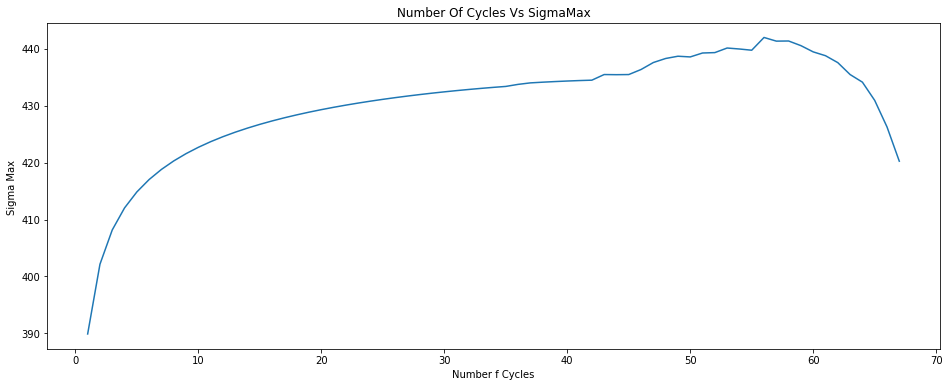

In [55]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi8['number_of_cycle'],new_bi8['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

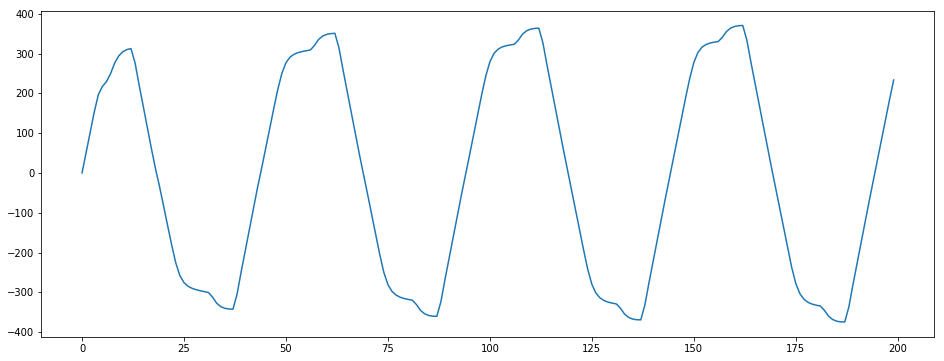

In [56]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi9['time'].head(200),bi9['sig11'].head(200))

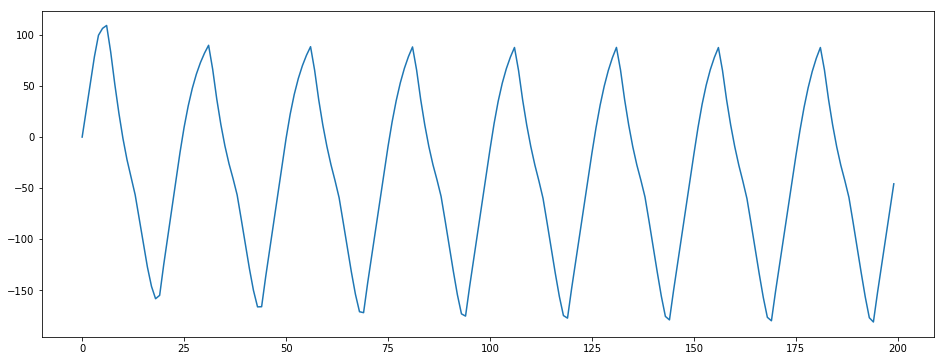

In [57]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi9['time'].head(200),bi9['sig12'].head(200))

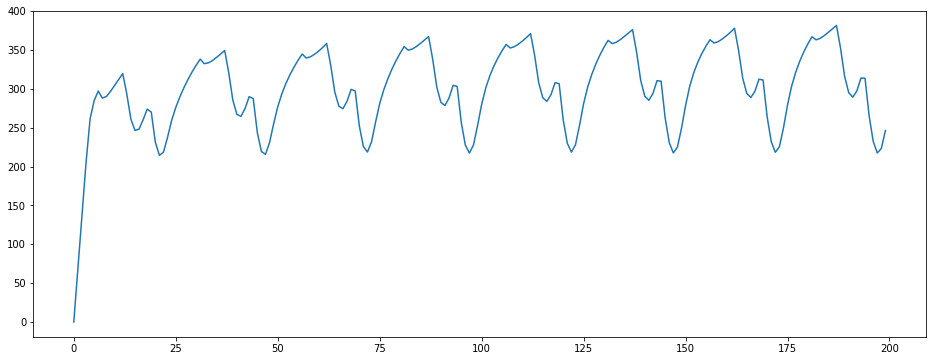

In [58]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi9['time'].head(200),bi9['sig_equ'].head(200))

In [59]:
bi9['sig_max']=0
bi9['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi9)-1):
  if bi9.iloc[i,5]>bi9.iloc[i+1,5] and bi9.iloc[i,5] > bi9.iloc[i-1,5] and bi9.iloc[i,5] > 0 and (bi9.iloc[i,0]-time)>=40 :
    count+=1
    time=bi9.iloc[i,0]
    bi9.iloc[i,6]=1
    bi9.iloc[i,7]=count
    
print(bi1.head())

   time    eto11       sig11    eto12      sig12     sig_equ  sig_max  \
0     0  0.00000    0.000000  0.00000   0.000000    0.000000        0   
1     1  0.00064   45.780480  0.00032  17.607877   55.008766        0   
2     2  0.00128   91.560957  0.00064  35.215752  110.017527        0   
3     3  0.00192  137.337337  0.00096  52.821467  165.020806        0   
4     4  0.00256  182.661448  0.00128  70.189930  219.419879        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [60]:
new_bi9=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi9)):
  if bi9.iloc[i,6]==1:
    new_bi9.loc[i,'Time']=bi9.iloc[i,0]
    new_bi9.loc[i,'eto11']=bi9.iloc[i,1]
    new_bi9.loc[i,'sig11']=bi9.iloc[i,2]
    new_bi9.loc[i,'eto12']=bi9.iloc[i,3]
    new_bi9.loc[i,'sig12']=bi9.iloc[i,4]
    new_bi9.loc[i,'sig_eq']=bi9.iloc[i,5]
    new_bi9.loc[i,'number_of_cycle']=bi9.iloc[i,7]
    
    
print(new_bi9.head())

    Time number_of_cycle       eto11    sig11        eto12    sig12   sig_eq
43    43               1 -0.00507153 -38.2378  -0.00261919 -166.052  290.141
87    87               2 -0.00863775 -360.282  0.000241793  -41.791  367.481
131  131               3 -0.00428483 -329.256   0.00285609  87.7017  362.608
181  181               4 -0.00428471 -334.434   0.00285637    87.61   367.25
231  231               5 -0.00428478   -337.8   0.00285631  87.6097  370.317


Text(0,0.5,'Sigma Max ')

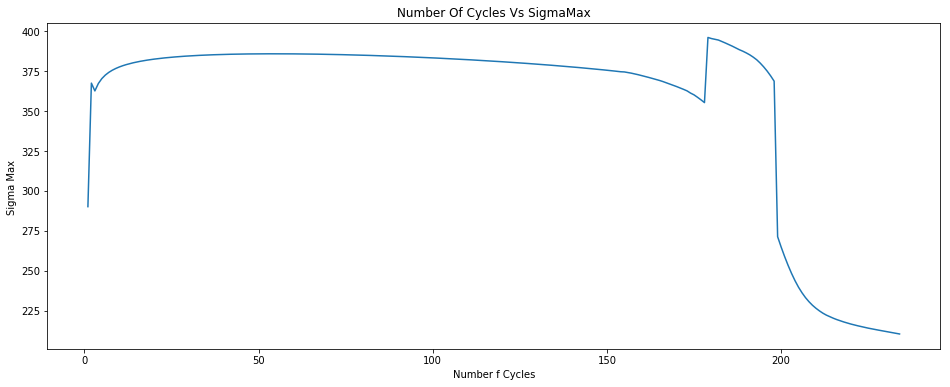

In [61]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi9['number_of_cycle'],new_bi9['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

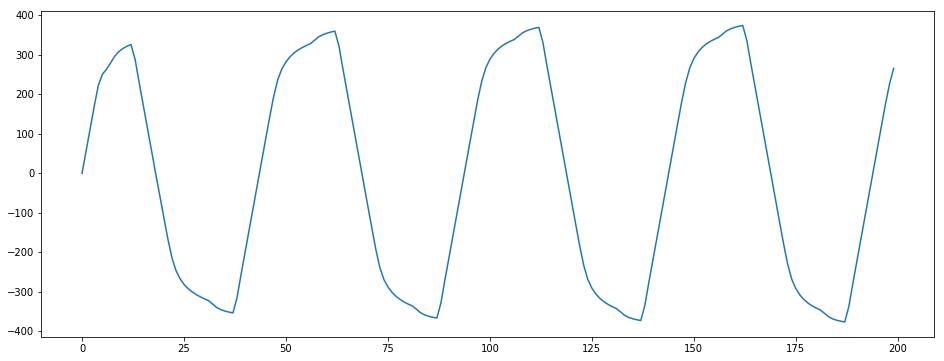

In [62]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi10['time'].head(200),bi10['sig11'].head(200))



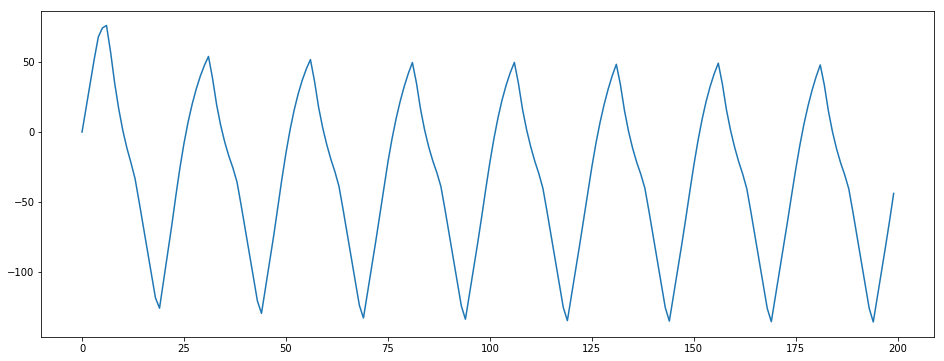

In [63]:

f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi10['time'].head(200),bi10['sig12'].head(200))


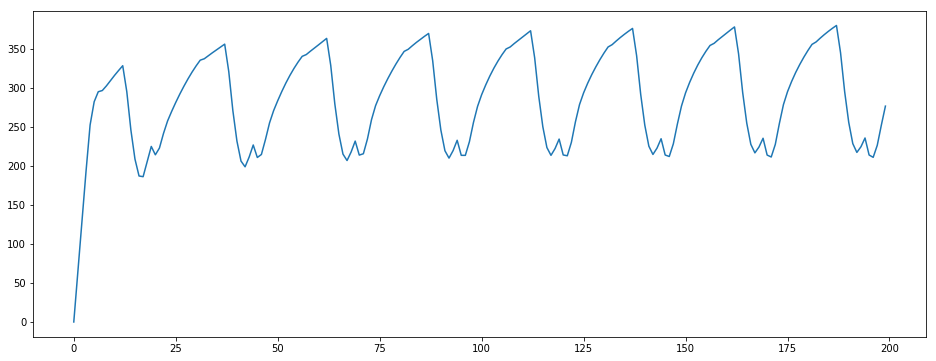

In [64]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi10['time'].head(200),bi10['sig_equ'].head(200))

In [65]:

bi10['sig_max']=0
bi10['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi10)-1):
  if bi10.iloc[i,5]>bi10.iloc[i+1,5] and bi10.iloc[i,5] > bi10.iloc[i-1,5] and bi10.iloc[i,5] > 0 and (bi10.iloc[i,0]-time)>=40 :
    count+=1
    time=bi10.iloc[i,0]
    bi10.iloc[i,6]=1
    bi10.iloc[i,7]=count
    
print(bi10.head())


   time     eto11       sig11     eto12      sig12     sig_equ  sig_max  \
0     0  0.000000    0.000000  0.000000   0.000000    0.000000        0   
1     1  0.000794   56.771433  0.000317  17.468133   64.330418        0   
2     2  0.001587  113.542812  0.000635  34.936245  128.660770        0   
3     3  0.002381  170.269162  0.000952  52.385645  192.936143        0   
4     4  0.003175  223.126185  0.001270  68.250757  252.507014        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [66]:
new_bi10=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi10)):
  if bi10.iloc[i,6]==1:
    new_bi10.loc[i,'Time']=bi10.iloc[i,0]
    new_bi10.loc[i,'eto11']=bi10.iloc[i,1]
    new_bi10.loc[i,'sig11']=bi10.iloc[i,2]
    new_bi10.loc[i,'eto12']=bi10.iloc[i,3]
    new_bi10.loc[i,'sig12']=bi10.iloc[i,4]
    new_bi10.loc[i,'sig_eq']=bi10.iloc[i,5]
    new_bi10.loc[i,'number_of_cycle']=bi10.iloc[i,7]
    
    
print(new_bi10.head())


    Time number_of_cycle       eto11    sig11        eto12    sig12   sig_eq
44    44               1 -0.00483997   28.857  -0.00193582 -129.939  226.903
87    87               2 -0.00959682 -366.432  0.000161353 -29.0802  369.878
137  137               3 -0.00959678 -372.674  0.000161271 -30.1724   376.32
187  187               4 -0.00959698 -376.397  0.000161281  -30.644  380.121
237  237               5  -0.0095975 -378.954  0.000161319 -30.9102  382.717


Text(0,0.5,'Sigma Max ')

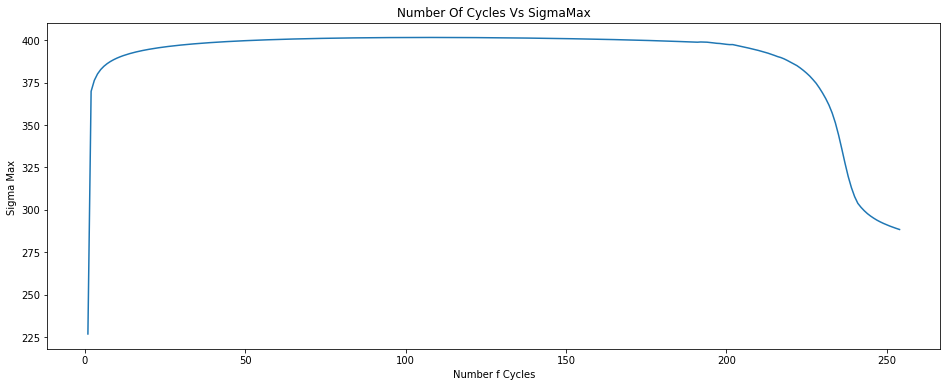

In [67]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi10['number_of_cycle'],new_bi10['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

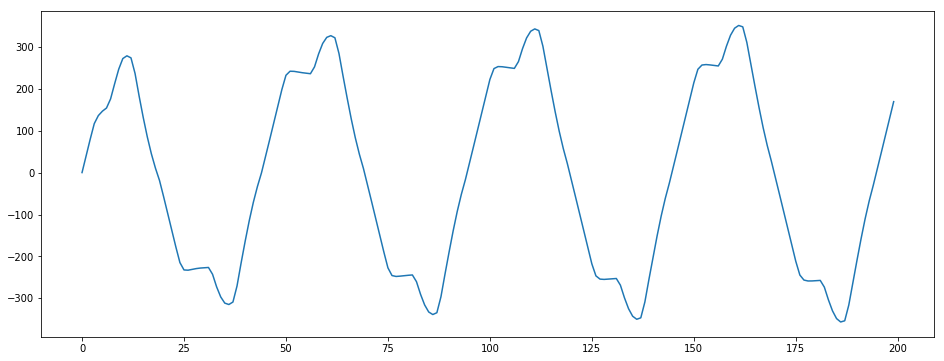

In [68]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi11['time'].head(200),bi11['sig11'].head(200))

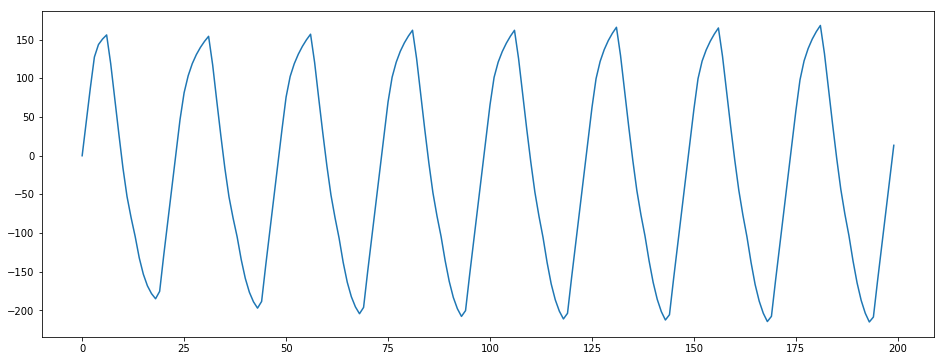

In [69]:

f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi11['time'].head(200),bi11['sig12'].head(200))

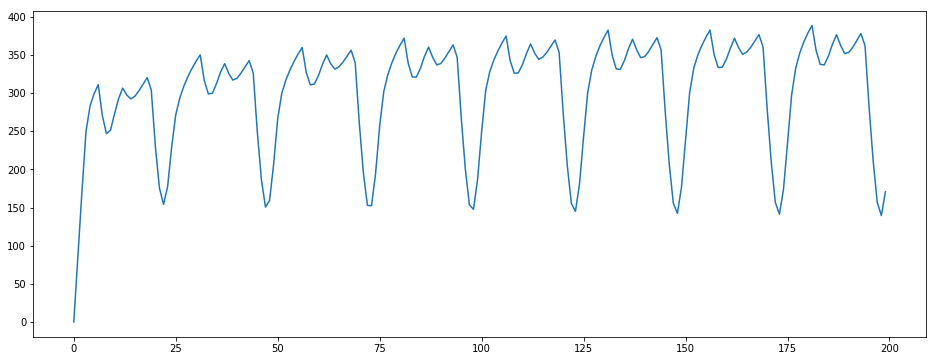

In [70]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi11['time'].head(200),bi11['sig_equ'].head(200))

In [71]:

bi11['sig_max']=0
bi11['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi11)-1):
  if bi11.iloc[i,5]>bi11.iloc[i+1,5] and bi11.iloc[i,5] > bi11.iloc[i-1,5] and bi11.iloc[i,5] > 0 and (bi11.iloc[i,0]-time)>=40 :
    count+=1
    time=bi11.iloc[i,0]
    bi11.iloc[i,6]=1
    bi11.iloc[i,7]=count
    
print(bi11.head())

   time     eto11       sig11     eto12       sig12     sig_equ  sig_max  \
0     0  0.000000    0.000000  0.000000    0.000000    0.000000        0   
1     1  0.000556   39.740000  0.000794   43.670329   85.443318        0   
2     2  0.001111   79.475402  0.001587   87.334091  170.874427        0   
3     3  0.001667  116.769952  0.002381  127.552673  249.888525        0   
4     4  0.002222  135.942301  0.003175  143.685943  283.579372        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [72]:
new_bi11=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi11)):
  if bi11.iloc[i,6]==1:
    new_bi11.loc[i,'Time']=bi11.iloc[i,0]
    new_bi11.loc[i,'eto11']=bi11.iloc[i,1]
    new_bi11.loc[i,'sig11']=bi11.iloc[i,2]
    new_bi11.loc[i,'eto12']=bi11.iloc[i,3]
    new_bi11.loc[i,'sig12']=bi11.iloc[i,4]
    new_bi11.loc[i,'sig_eq']=bi11.iloc[i,5]
    new_bi11.loc[i,'number_of_cycle']=bi11.iloc[i,7]
    
    
print(new_bi11.head())

    Time number_of_cycle       eto11    sig11        eto12    sig12   sig_eq
43    43               1 -0.00394428  -33.346  -0.00436502 -196.947  342.747
87    87               2 -0.00671799 -334.195  0.000403026 -77.8733  360.387
131  131               3 -0.00333206 -252.583    0.0047599  166.023  382.738
181  181               4 -0.00333192 -257.169   0.00476001  168.363  388.811
231  231               5 -0.00333171 -260.014   0.00475997  169.957  392.764


Text(0,0.5,'Sigma Max ')

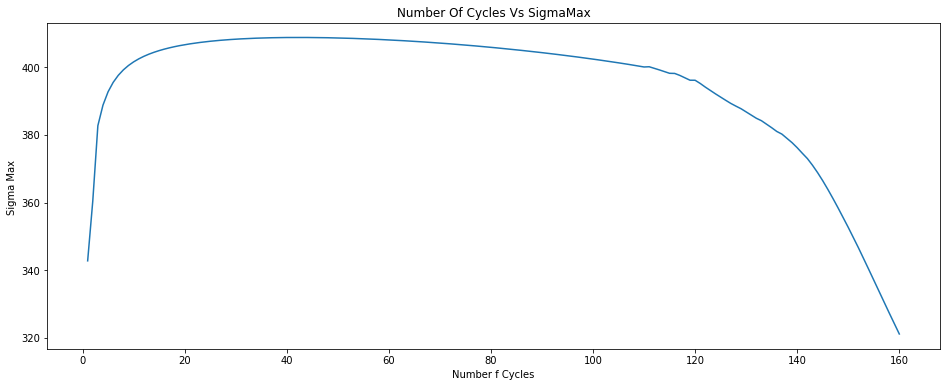

In [73]:

f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi11['number_of_cycle'],new_bi11['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

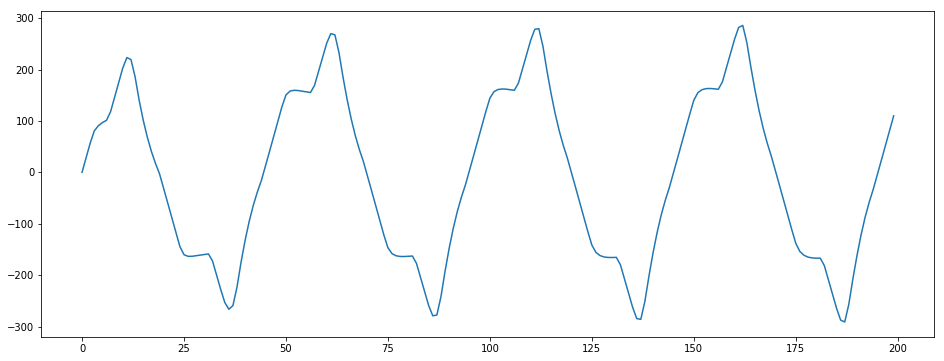

In [74]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi12['time'].head(200),bi12['sig11'].head(200))

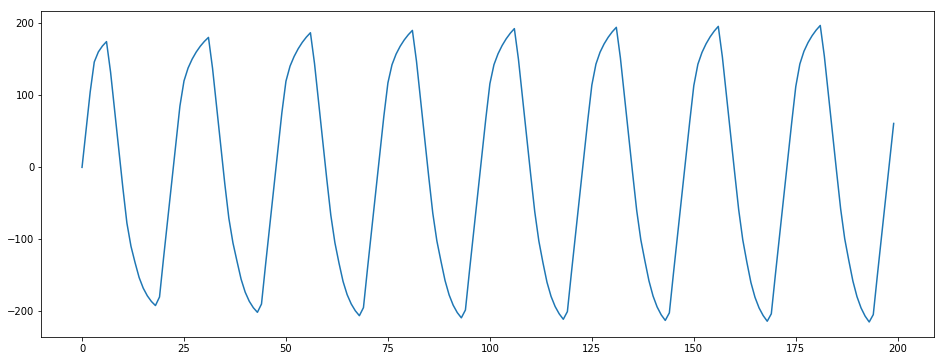

In [75]:

f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi12['time'].head(200),bi12['sig12'].head(200))

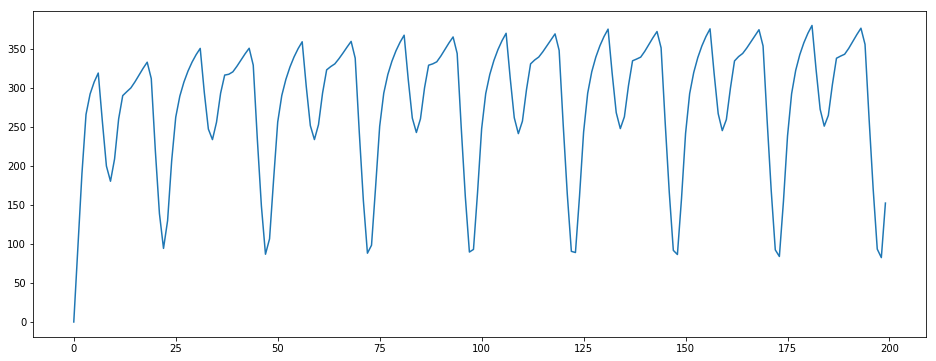

In [76]:

f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi12['time'].head(200),bi12['sig_equ'].head(200))

In [77]:
bi12['sig_max']=0
bi12['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi12)-1):
  if bi12.iloc[i,5]>bi12.iloc[i+1,5] and bi12.iloc[i,5] > bi12.iloc[i-1,5] and bi12.iloc[i,5] > 0 and (bi12.iloc[i,0]-time)>=40 :
    count+=1
    time=bi12.iloc[i,0]
    bi12.iloc[i,6]=1
    bi12.iloc[i,7]=count
    
print(bi12.head())

   time     eto11      sig11     eto12       sig12     sig_equ  sig_max  \
0     0  0.000000   0.000000  0.000000    0.000000    0.000000        0   
1     1  0.000397  28.385715  0.000952   52.404396   95.102108        0   
2     2  0.000794  56.754185  0.001905  104.767932  190.131524        0   
3     3  0.001190  80.481790  0.002857  146.434483  266.094893        0   
4     4  0.001587  90.697435  0.003810  160.393193  292.239549        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [78]:
new_bi12=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi12)):
  if bi12.iloc[i,6]==1:
    new_bi12.loc[i,'Time']=bi12.iloc[i,0]
    new_bi12.loc[i,'eto11']=bi12.iloc[i,1]
    new_bi12.loc[i,'sig11']=bi12.iloc[i,2]
    new_bi12.loc[i,'eto12']=bi12.iloc[i,3]
    new_bi12.loc[i,'sig12']=bi12.iloc[i,4]
    new_bi12.loc[i,'sig_eq']=bi12.iloc[i,5]
    new_bi12.loc[i,'number_of_cycle']=bi12.iloc[i,7]
    
    
print(new_bi12.head())

    Time number_of_cycle       eto11    sig11       eto12    sig12   sig_eq
43    43               1 -0.00281709 -37.8812 -0.00523798 -201.413  350.908
93    93               2 -0.00281706 -48.7981 -0.00523766 -209.081  365.411
143  143               3 -0.00281715 -54.4951 -0.00523765 -212.657  372.342
193  193               4  -0.0028171 -58.1457 -0.00523726 -214.832  376.616
243  243               5 -0.00281689 -60.7701 -0.00523715 -216.347   379.62


Text(0,0.5,'Sigma Max ')

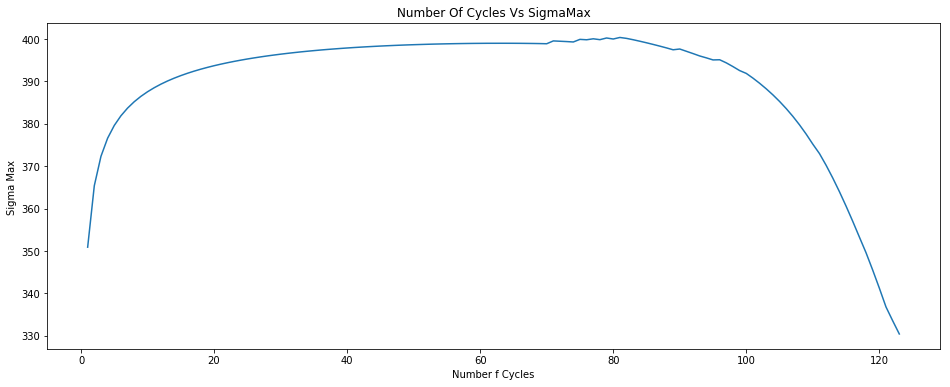

In [79]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi12['number_of_cycle'],new_bi12['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

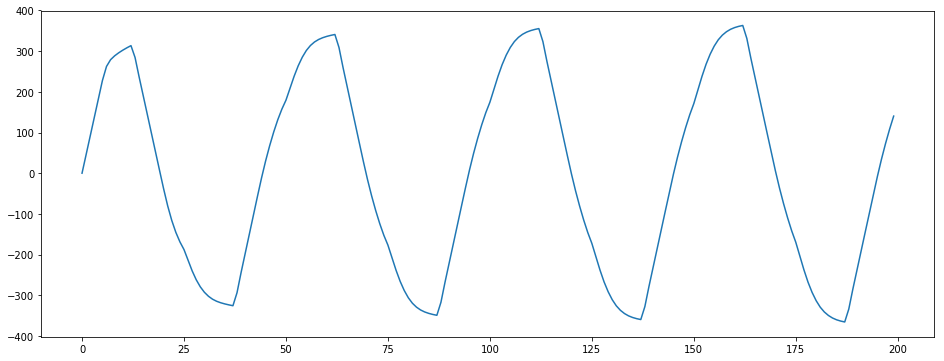

In [80]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi13['time'].head(200),bi13['sig11'].head(200))

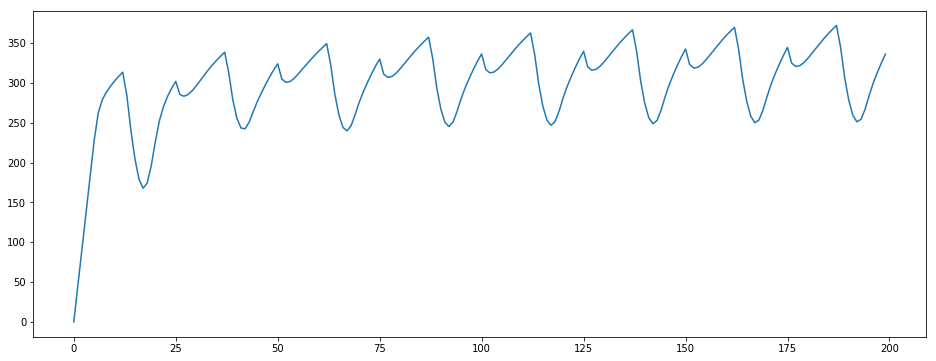

In [81]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi13['time'].head(200),bi13['sig_equ'].head(200))

In [82]:
bi13['sig_max']=0
bi13['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi13)-1):
  if bi13.iloc[i,5]>bi13.iloc[i+1,5] and bi13.iloc[i,5] > bi13.iloc[i-1,5] and bi13.iloc[i,5] > 0 and (bi13.iloc[i,0]-time)>=40 :
    count+=1
    time=bi13.iloc[i,0]
    bi13.iloc[i,6]=1
    bi13.iloc[i,7]=count
    
print(bi13.head())


   time    eto11       sig11  eto12  sig12     sig_equ  sig_max  \
0     0  0.00000    0.000000    0.0    0.0    0.000000        0   
1     1  0.00064   45.780481    0.0    0.0   45.780481        0   
2     2  0.00128   91.560964    0.0    0.0   91.560964        0   
3     3  0.00192  137.341220    0.0    0.0  137.341220        0   
4     4  0.00256  183.093343    0.0    0.0  183.093343        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [83]:
new_bi13=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi13)):
  if bi13.iloc[i,6]==1:
    new_bi13.loc[i,'Time']=bi13.iloc[i,0]
    new_bi13.loc[i,'eto11']=bi13.iloc[i,1]
    new_bi13.loc[i,'sig11']=bi13.iloc[i,2]
    new_bi13.loc[i,'eto12']=bi13.iloc[i,3]
    new_bi13.loc[i,'sig12']=bi13.iloc[i,4]
    new_bi13.loc[i,'sig_eq']=bi13.iloc[i,5]
    new_bi13.loc[i,'number_of_cycle']=bi13.iloc[i,7]
    
    
print(new_bi13.head())

    Time number_of_cycle        eto11    sig11       eto12    sig12   sig_eq
50    50               1  1.33017e-07  179.451 -0.00399985 -155.783  324.049
100  100               2  2.36245e-08  174.387 -0.00399999 -166.113  336.439
150  150               3  4.34864e-07  171.056 -0.00400003 -171.409  342.641
200  200               4   4.2315e-07  168.746 -0.00400015 -174.529  346.203
250  250               5  4.34184e-07   167.07 -0.00399983 -176.583  348.506


Text(0,0.5,'Sigma Max ')

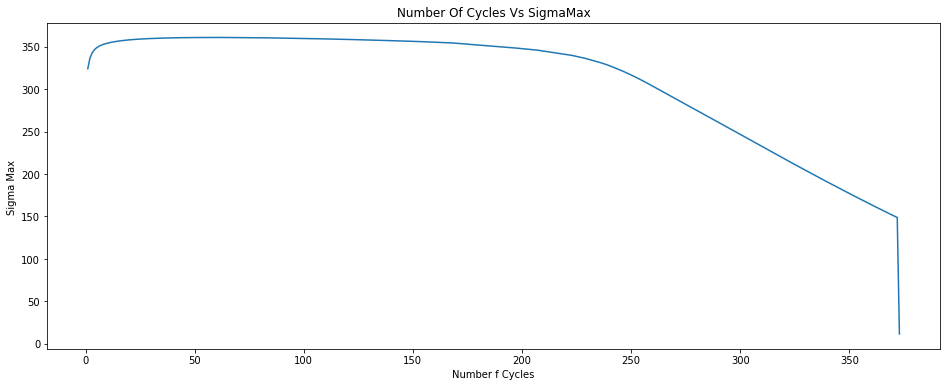

In [84]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi13['number_of_cycle'],new_bi13['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

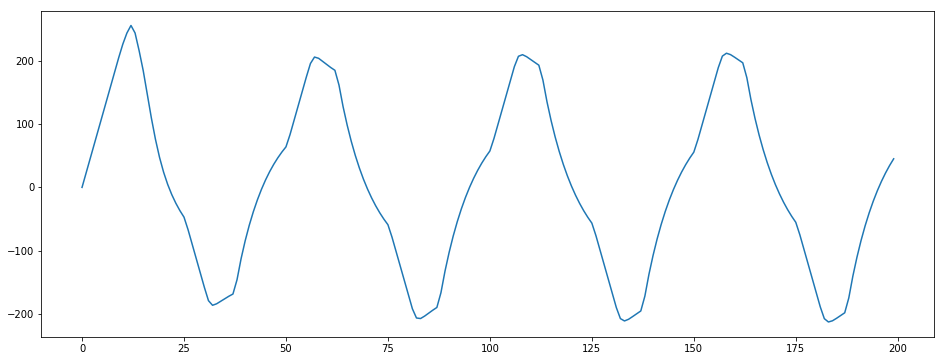

In [85]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi14['time'].head(200),bi14['sig11'].head(200))


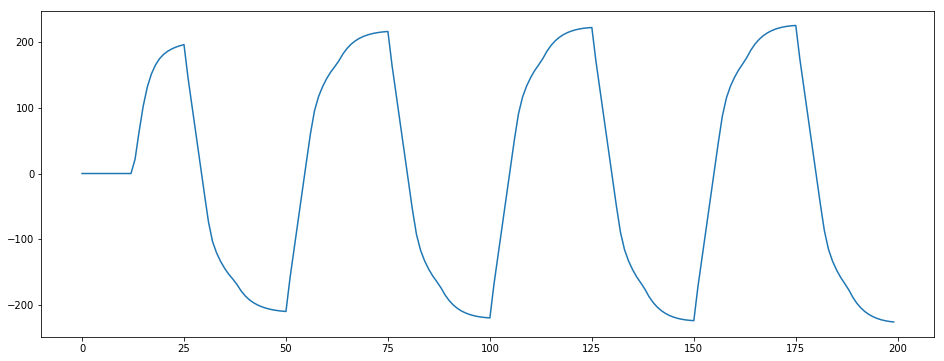

In [86]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi14['time'].head(200),bi14['sig12'].head(200))

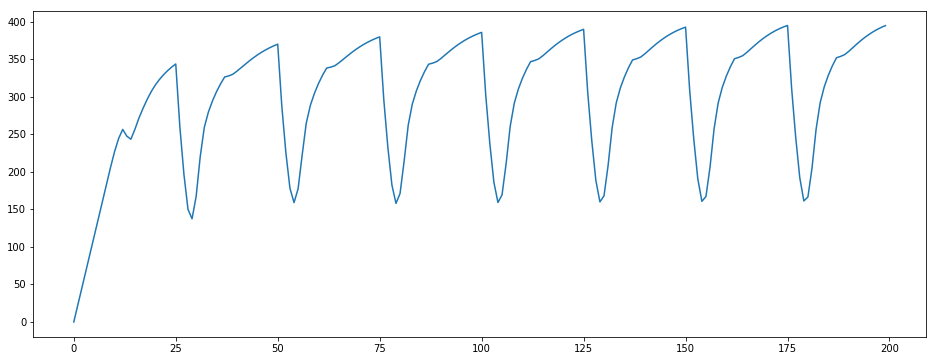

In [87]:

f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi14['time'].head(200),bi14['sig_equ'].head(200))


In [88]:
bi14['sig_max']=0
bi14['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi14)-1):
  if bi14.iloc[i,5]>bi14.iloc[i+1,5] and bi14.iloc[i,5] > bi14.iloc[i-1,5] and bi14.iloc[i,5] > 0 and (bi14.iloc[i,0]-time)>=40 :
    count+=1
    time=bi14.iloc[i,0]
    bi14.iloc[i,6]=1
    bi14.iloc[i,7]=count
    
print(bi14.head())

   time    eto11     sig11  eto12  sig12   sig_equ  sig_max  number_of _cycle
0     0  0.00000   0.00000    0.0    0.0   0.00000        0                 0
1     1  0.00032  22.89024    0.0    0.0  22.89024        0                 0
2     2  0.00064  45.78048    0.0    0.0  45.78048        0                 0
3     3  0.00096  68.67072    0.0    0.0  68.67072        0                 0
4     4  0.00128  91.56096    0.0    0.0  91.56096        0                 0


In [89]:
new_bi14=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi14)):
  if bi14.iloc[i,6]==1:
    new_bi14.loc[i,'Time']=bi14.iloc[i,0]
    new_bi14.loc[i,'eto11']=bi14.iloc[i,1]
    new_bi14.loc[i,'sig11']=bi14.iloc[i,2]
    new_bi14.loc[i,'eto12']=bi14.iloc[i,3]
    new_bi14.loc[i,'sig12']=bi14.iloc[i,4]
    new_bi14.loc[i,'sig_eq']=bi14.iloc[i,5]
    new_bi14.loc[i,'number_of_cycle']=bi14.iloc[i,7]
    
    
print(new_bi14.head())


    Time number_of_cycle        eto11    sig11       eto12    sig12   sig_eq
50    50               1  1.99524e-08  64.1716 -0.00999991 -210.374  369.986
100  100               2 -7.33604e-08  57.6786       -0.01 -220.153  385.654
150  150               3 -1.65523e-07  55.8378  -0.0100001  -224.38  392.628
200  200               4 -1.62064e-07  54.8409 -0.00999982  -226.81  396.655
250  250               5 -1.76302e-07  54.1752       -0.01 -228.486   399.44


Text(0,0.5,'Sigma Max ')

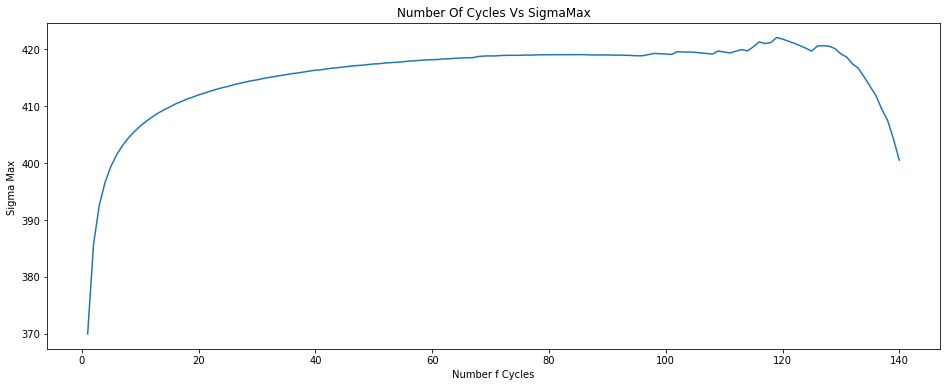

In [90]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi14['number_of_cycle'],new_bi14['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

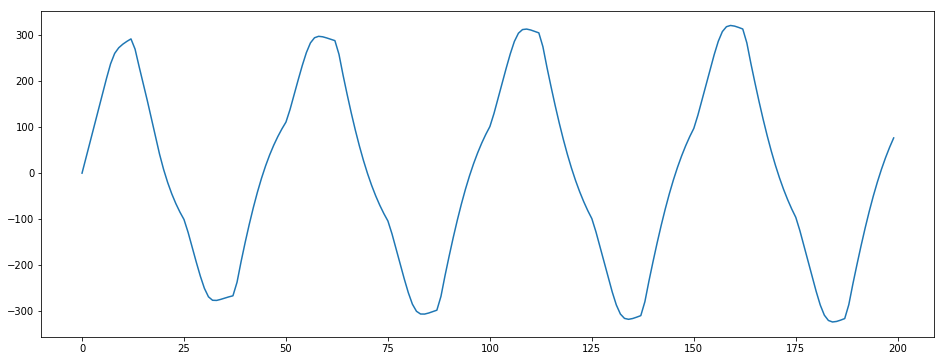

In [91]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi15['time'].head(200),bi15['sig11'].head(200))

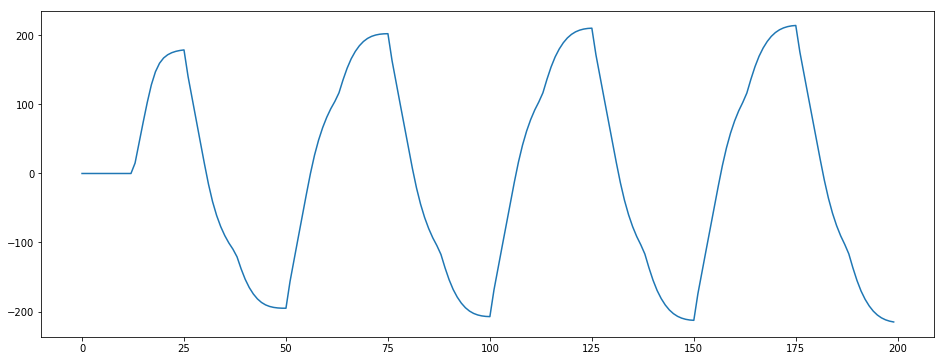

In [92]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi15['time'].head(200),bi15['sig12'].head(200))

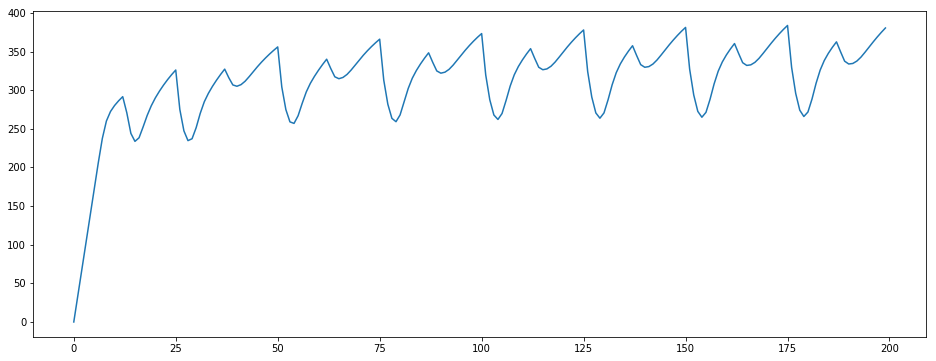

In [93]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi15['time'].head(200),bi15['sig_equ'].head(200))

In [94]:
bi15['sig_max']=0
bi15['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi15)-1):
  if bi15.iloc[i,5]>bi15.iloc[i+1,5] and bi15.iloc[i,5] > bi15.iloc[i-1,5] and bi15.iloc[i,5] > 0 and (bi15.iloc[i,0]-time)>=40 :
    count+=1
    time=bi15.iloc[i,0]
    bi15.iloc[i,6]=1
    bi15.iloc[i,7]=count
    
print(bi15.head())

   time    eto11       sig11  eto12  sig12     sig_equ  sig_max  \
0     0  0.00000    0.000000    0.0    0.0    0.000000        0   
1     1  0.00048   34.335360    0.0    0.0   34.335360        0   
2     2  0.00096   68.670720    0.0    0.0   68.670720        0   
3     3  0.00144  103.006079    0.0    0.0  103.006079        0   
4     4  0.00192  137.341142    0.0    0.0  137.341142        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [95]:
new_bi15=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi15)):
  if bi15.iloc[i,6]==1:
    new_bi15.loc[i,'Time']=bi15.iloc[i,0]
    new_bi15.loc[i,'eto11']=bi15.iloc[i,1]
    new_bi15.loc[i,'sig11']=bi15.iloc[i,2]
    new_bi15.loc[i,'eto12']=bi15.iloc[i,3]
    new_bi15.loc[i,'sig12']=bi15.iloc[i,4]
    new_bi15.loc[i,'sig_eq']=bi15.iloc[i,5]
    new_bi15.loc[i,'number_of_cycle']=bi15.iloc[i,7]
    
    
print(new_bi15.head())

    Time number_of_cycle        eto11    sig11       eto12    sig12   sig_eq
50    50               1  3.28219e-07  110.928 -0.00700007 -195.263  355.932
100  100               2  1.07143e-07  101.226 -0.00700021 -207.395  373.209
150  150               3  6.09611e-07  97.2728 -0.00699995 -212.782   381.17
200  200               4  5.81963e-07  94.9316 -0.00699981 -215.778  385.607
250  250               5  7.84367e-07  93.3483 -0.00699966 -217.689  388.432


Text(0,0.5,'Sigma Max ')

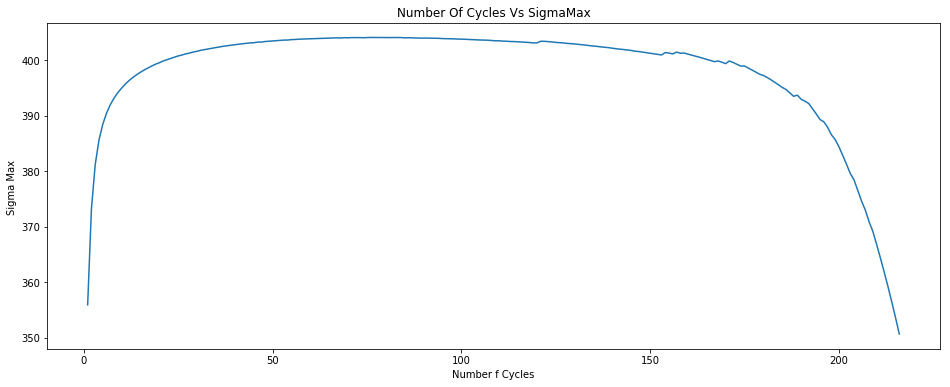

In [96]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi15['number_of_cycle'],new_bi15['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

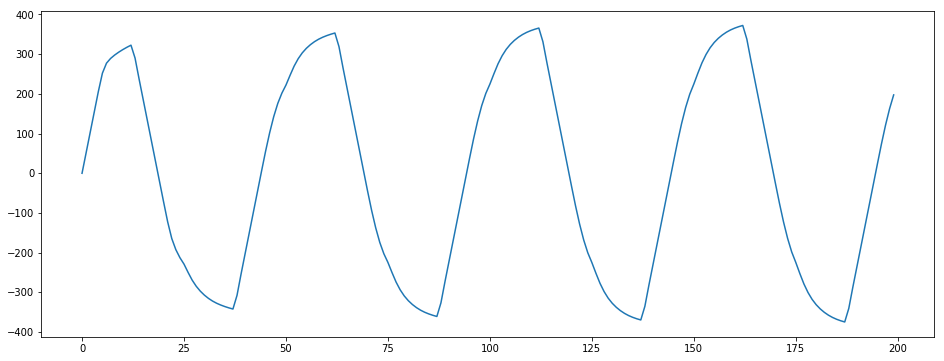

In [97]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi16['time'].head(200),bi16['sig11'].head(200))

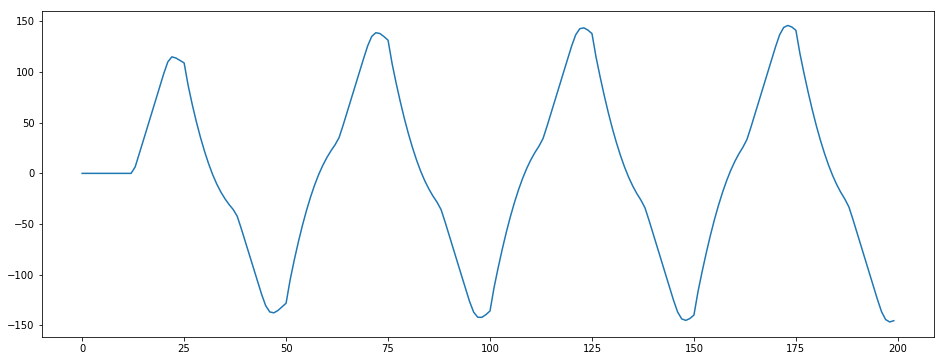

In [98]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi16['time'].head(200),bi16['sig12'].head(200))

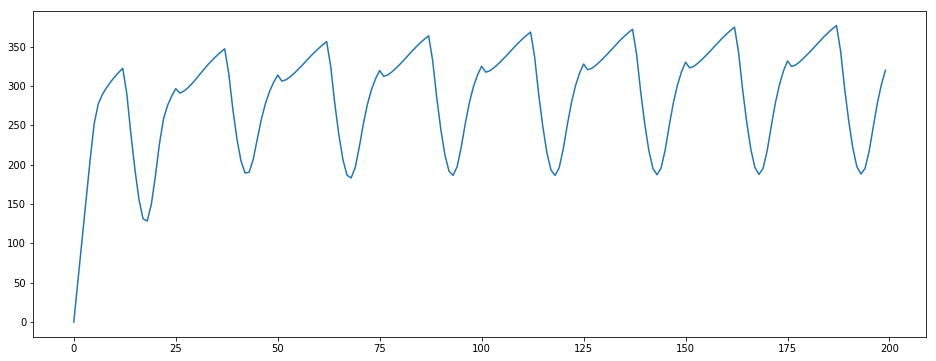

In [99]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi16['time'].head(200),bi16['sig_equ'].head(200))


In [100]:

bi16['sig_max']=0
bi16['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi16)-1):
  if bi16.iloc[i,5]>bi16.iloc[i+1,5] and bi16.iloc[i,5] > bi16.iloc[i-1,5] and bi16.iloc[i,5] > 0 and (bi16.iloc[i,0]-time)>=40 :
    count+=1
    time=bi16.iloc[i,0]
    bi16.iloc[i,6]=1
    bi16.iloc[i,7]=count
    
print(bi16.head())

   time    eto11       sig11  eto12  sig12     sig_equ  sig_max  \
0     0  0.00000    0.000000    0.0    0.0    0.000000        0   
1     1  0.00072   51.503044    0.0    0.0   51.503044        0   
2     2  0.00144  103.006107    0.0    0.0  103.006107        0   
3     3  0.00216  154.507658    0.0    0.0  154.507658        0   
4     4  0.00288  205.835691    0.0    0.0  205.835691        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [101]:

new_bi16=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi16)):
  if bi16.iloc[i,6]==1:
    new_bi16.loc[i,'Time']=bi16.iloc[i,0]
    new_bi16.loc[i,'eto11']=bi16.iloc[i,1]
    new_bi16.loc[i,'sig11']=bi16.iloc[i,2]
    new_bi16.loc[i,'eto12']=bi16.iloc[i,3]
    new_bi16.loc[i,'sig12']=bi16.iloc[i,4]
    new_bi16.loc[i,'sig_eq']=bi1.iloc[i,5]
    new_bi16.loc[i,'number_of_cycle']=bi16.iloc[i,7]
    
    
print(new_bi16.head())

    Time number_of_cycle        eto11    sig11       eto12    sig12   sig_eq
50    50               1   -2.096e-08  222.135 -0.00300004 -128.178  269.479
100  100               2  -1.4851e-07  224.556 -0.00299992 -135.817  274.655
150  150               3    4.155e-07  224.665 -0.00299993 -139.878  275.764
200  200               4 -9.45987e-08  224.354 -0.00299976  -142.28  276.172
250  250               5 -1.09375e-07  223.986 -0.00299985 -143.862  276.392


Text(0,0.5,'Sigma Max ')

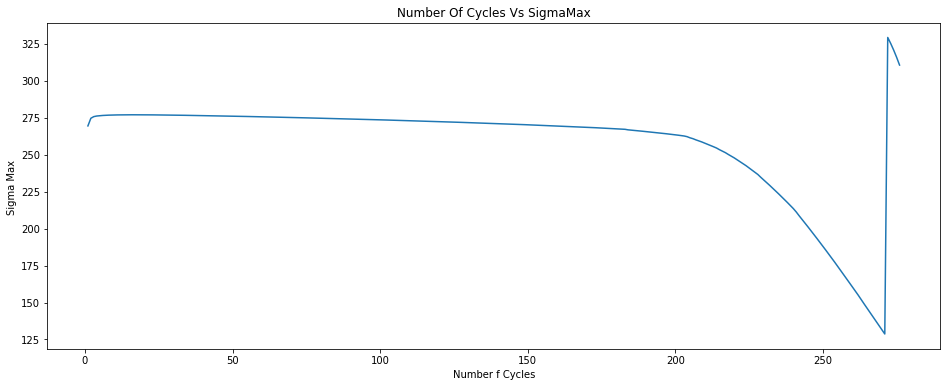

In [102]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi16['number_of_cycle'],new_bi16['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

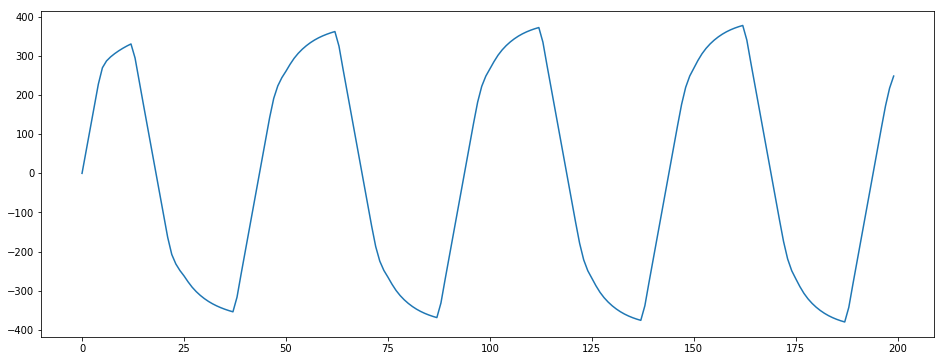

In [103]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi17['time'].head(200),bi17['sig11'].head(200))

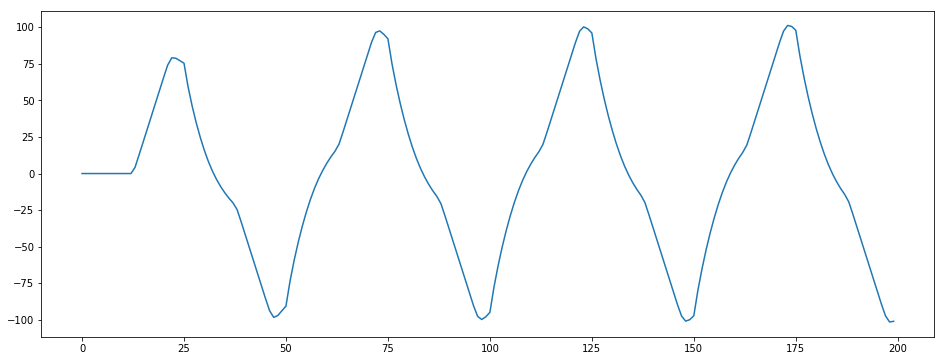

In [104]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi17['time'].head(200),bi17['sig12'].head(200))

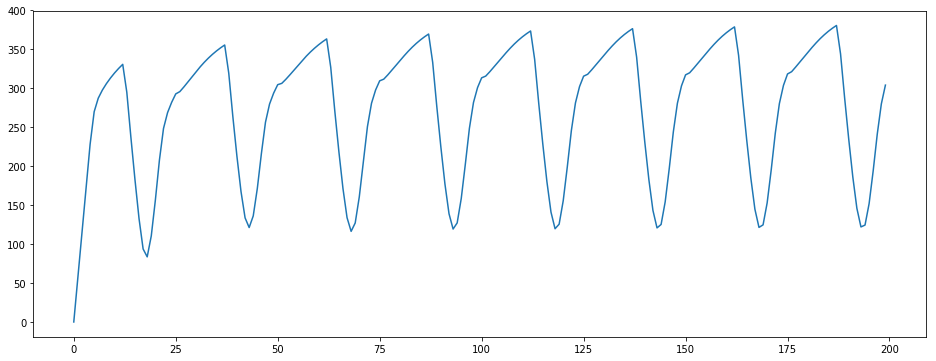

In [105]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi17['time'].head(200),bi17['sig_equ'].head(200))

In [106]:

bi17['sig_max']=0
bi17['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi17)-1):
  if bi17.iloc[i,5]>bi17.iloc[i+1,5] and bi17.iloc[i,5] > bi17.iloc[i-1,5] and bi17.iloc[i,5] > 0 and (bi17.iloc[i,0]-time)>=40 :
    count+=1
    time=bi17.iloc[i,0]
    bi17.iloc[i,6]=1
    bi17.iloc[i,7]=count
    
print(bi17.head())

   time   eto11       sig11  eto12  sig12     sig_equ  sig_max  \
0     0  0.0000    0.000000    0.0    0.0    0.000000        0   
1     1  0.0008   57.225600    0.0    0.0   57.225600        0   
2     2  0.0016  114.451193    0.0    0.0  114.451193        0   
3     3  0.0024  171.668991    0.0    0.0  171.668991        0   
4     4  0.0032  228.040837    0.0    0.0  228.040837        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [107]:
new_bi17=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi17)):
  if bi17.iloc[i,6]==1:
    new_bi17.loc[i,'Time']=bi17.iloc[i,0]
    new_bi17.loc[i,'eto11']=bi17.iloc[i,1]
    new_bi17.loc[i,'sig11']=bi17.iloc[i,2]
    new_bi17.loc[i,'eto12']=bi17.iloc[i,3]
    new_bi17.loc[i,'sig12']=bi17.iloc[i,4]
    new_bi17.loc[i,'sig_eq']=bi17.iloc[i,5]
    new_bi17.loc[i,'number_of_cycle']=bi17.iloc[i,7]
    
    
print(new_bi17.head())

    Time number_of_cycle       eto11    sig11        eto12    sig12   sig_eq
62    62               1  0.00960018  362.472 -8.00002e-05  15.1611  363.422
112  112               2  0.00960016  372.711  -7.9982e-05  14.8551  373.598
162  162               3  0.00960007  378.016 -8.00497e-05  14.4597  378.845
212  212               4  0.00959983  381.396 -8.00393e-05  14.1664  382.185
262  262               5  0.00959984  383.798 -8.00184e-05  13.9445  384.557


Text(0,0.5,'Sigma Max ')

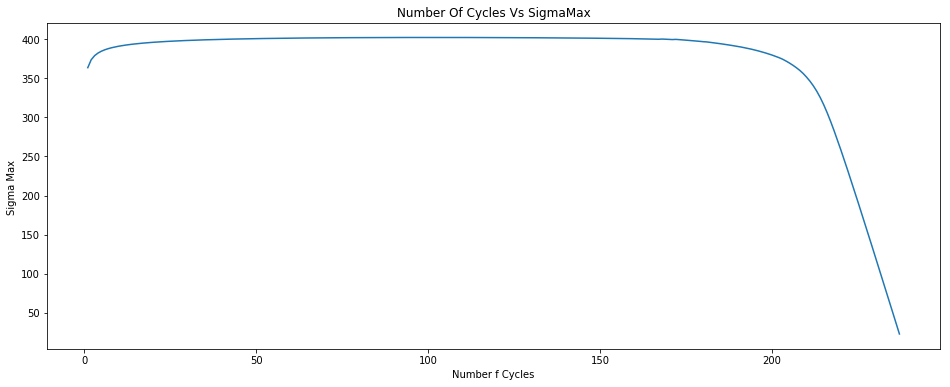

In [108]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi17['number_of_cycle'],new_bi17['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

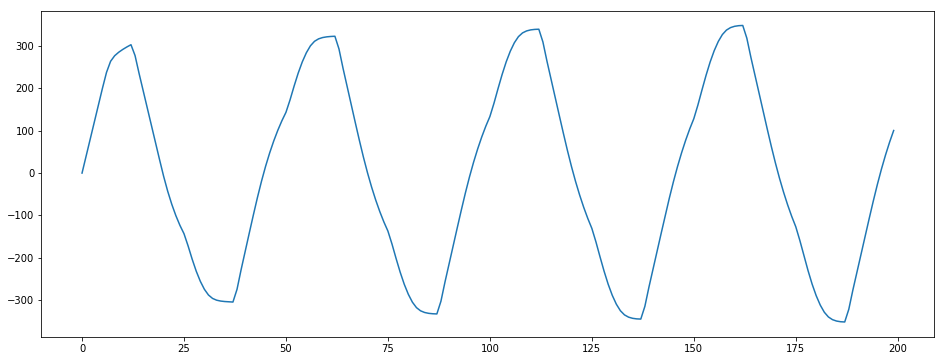

In [109]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi18['time'].head(200),bi18['sig11'].head(200))

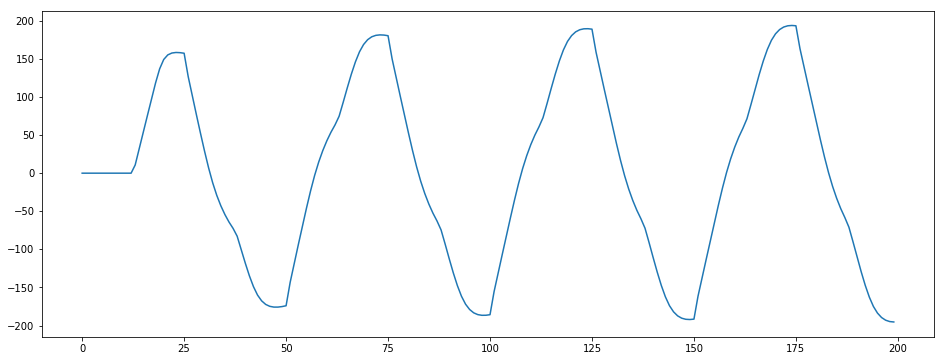

In [110]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi18['time'].head(200),bi18['sig12'].head(200))

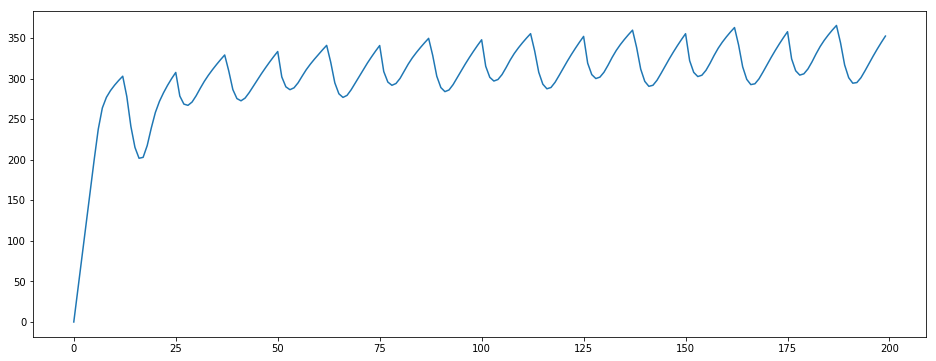

In [111]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi18['time'].head(200),bi18['sig_equ'].head(200))

In [112]:

bi18['sig_max']=0
bi18['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi18)-1):
  if bi18.iloc[i,5]>bi18.iloc[i+1,5] and bi18.iloc[i,5] > bi18.iloc[i-1,5] and bi18.iloc[i,5] > 0 and (bi18.iloc[i,0]-time)>=40 :
    count+=1
    time=bi18.iloc[i,0]
    bi18.iloc[i,6]=1
    bi18.iloc[i,7]=count
    
print(bi18.head())

   time    eto11       sig11  eto12  sig12     sig_equ  sig_max  \
0     0  0.00000    0.000000    0.0    0.0    0.000000        0   
1     1  0.00056   40.057920    0.0    0.0   40.057920        0   
2     2  0.00112   80.115840    0.0    0.0   80.115840        0   
3     3  0.00168  120.173736    0.0    0.0  120.173736        0   
4     4  0.00224  160.228171    0.0    0.0  160.228171        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [113]:
new_bi18=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi18)):
  if bi18.iloc[i,6]==1:
    new_bi18.loc[i,'Time']=bi18.iloc[i,0]
    new_bi18.loc[i,'eto11']=bi18.iloc[i,1]
    new_bi18.loc[i,'sig11']=bi18.iloc[i,2]
    new_bi18.loc[i,'eto12']=bi18.iloc[i,3]
    new_bi18.loc[i,'sig12']=bi18.iloc[i,4]
    new_bi18.loc[i,'sig_eq']=bi18.iloc[i,5]
    new_bi18.loc[i,'number_of_cycle']=bi18.iloc[i,7]
    
    
print(new_bi18.head())

    Time number_of_cycle        eto11    sig11       eto12    sig12   sig_eq
50    50               1  5.18233e-07  143.548 -0.00500001 -173.969  333.769
100  100               2  2.11306e-07  133.592 -0.00499998 -185.688  348.263
150  150               3  2.62873e-07  128.553 -0.00499971 -191.516  355.754
200  200               4  5.00205e-07  125.486  -0.0049999 -194.918  360.174
250  250               5  3.00669e-07  123.402 -0.00499991 -197.131  363.057


Text(0,0.5,'Sigma Max ')

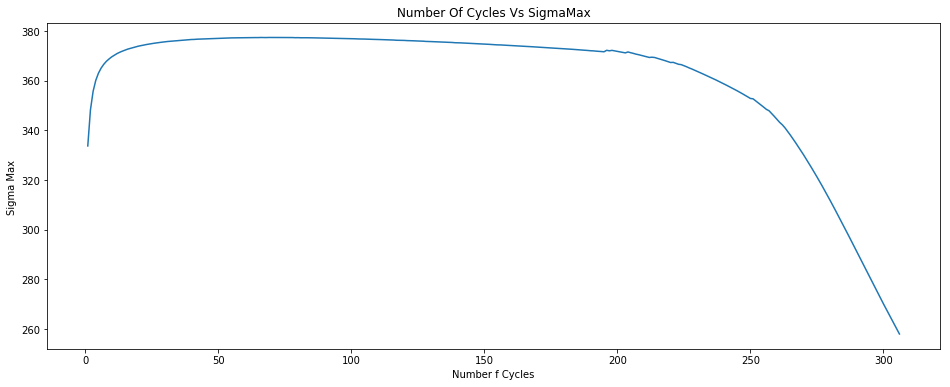

In [114]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi18['number_of_cycle'],new_bi18['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

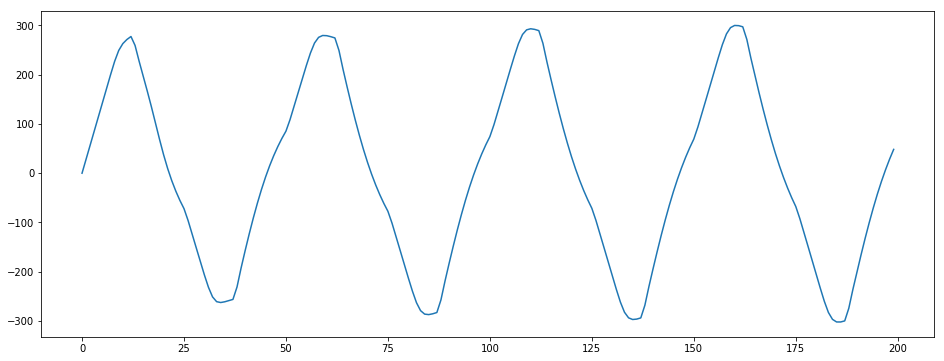

In [115]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi19['time'].head(200),bi19['sig11'].head(200))

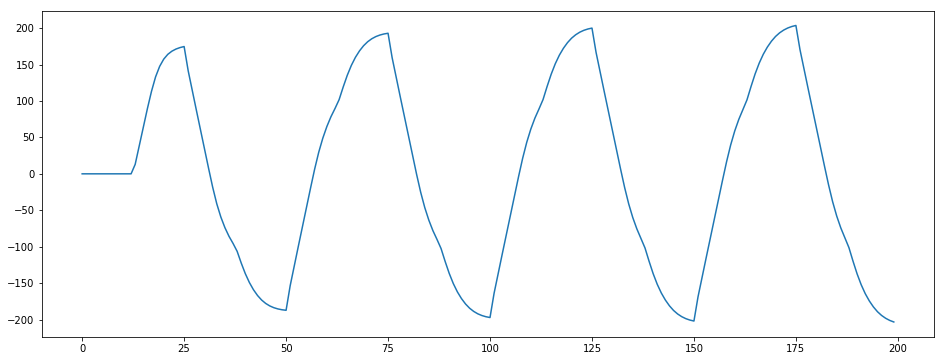

In [116]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi19['time'].head(200),bi19['sig12'].head(200))

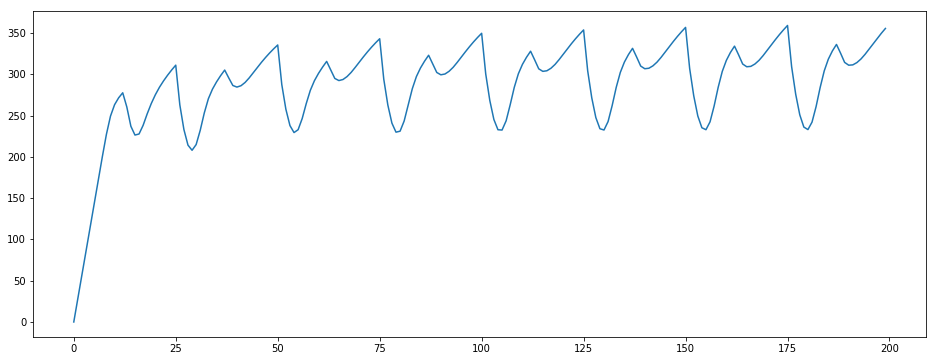

In [117]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(bi19['time'].head(200),bi19['sig_equ'].head(200))

In [118]:
bi19['sig_max']=0
bi19['number_of _cycle']=0
count=0
time=0
for i in range(1,len(bi19)-1):
  if bi19.iloc[i,5]>bi19.iloc[i+1,5] and bi19.iloc[i,5] > bi19.iloc[i-1,5] and bi19.iloc[i,5] > 0 and (bi19.iloc[i,0]-time)>=40 :
    count+=1
    time=bi19.iloc[i,0]
    bi19.iloc[i,6]=1
    bi19.iloc[i,7]=count
    
print(bi19.head())

   time   eto11       sig11  eto12  sig12     sig_equ  sig_max  \
0     0  0.0000    0.000000    0.0    0.0    0.000000        0   
1     1  0.0004   28.612801    0.0    0.0   28.612801        0   
2     2  0.0008   57.225612    0.0    0.0   57.225612        0   
3     3  0.0012   85.838419    0.0    0.0   85.838419        0   
4     4  0.0016  114.451193    0.0    0.0  114.451193        0   

   number_of _cycle  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [119]:
new_bi19=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(bi19)):
  if bi19.iloc[i,6]==1:
    new_bi19.loc[i,'Time']=bi19.iloc[i,0]
    new_bi19.loc[i,'eto11']=bi19.iloc[i,1]
    new_bi19.loc[i,'sig11']=bi19.iloc[i,2]
    new_bi19.loc[i,'eto12']=bi19.iloc[i,3]
    new_bi19.loc[i,'sig12']=bi19.iloc[i,4]
    new_bi19.loc[i,'sig_eq']=bi19.iloc[i,5]
    new_bi19.loc[i,'number_of_cycle']=bi19.iloc[i,7]
    
    
print(new_bi19.head())

    Time number_of_cycle        eto11    sig11       eto12    sig12   sig_eq
50    50               1  2.82922e-08  85.4522 -0.00599977 -187.291  335.464
100  100               2  1.10879e-07   74.361 -0.00599991 -197.235   349.62
150  150               3  1.15948e-07  69.3488  -0.0059998 -202.044  356.756
200  200               4  5.34613e-08  66.3614 -0.00599981 -204.827  360.924
250  250               5   3.1499e-07  64.3618 -0.00599995 -206.646  363.663


Text(0,0.5,'Sigma Max ')

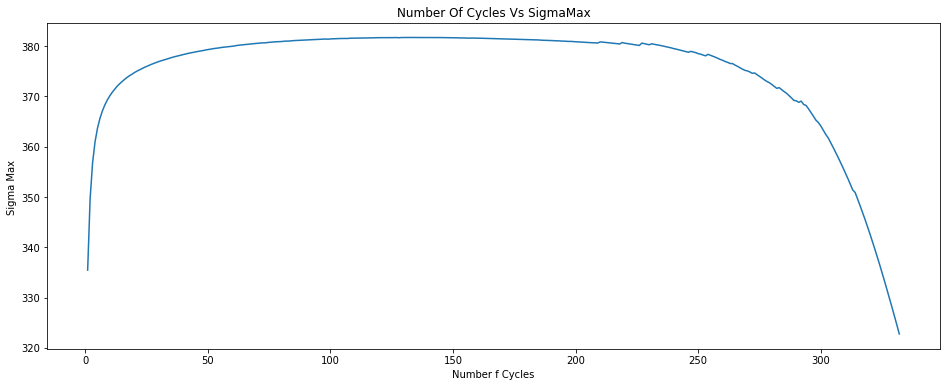

In [120]:
f,ax=plt.subplots(figsize=(16,6))
ax.plot(new_bi19['number_of_cycle'],new_bi19['sig_eq'])
ax.set_title('Number Of Cycles Vs SigmaMax')
ax.set_xlabel('Number f Cycles')
ax.set_ylabel('Sigma Max ')

In [121]:
 def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN valuestype(new_uni4.iloc[1,2])
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [122]:
All_data=pd.concat([new_bi1,new_bi2,new_bi3,new_bi4,new_bi5,new_bi6,new_bi7,new_bi8,new_bi9,new_bi10,new_bi11,new_bi12,new_bi13,new_bi14,new_bi15,new_bi16,new_bi17,new_bi18,new_bi19])

In [123]:
print(len(All_data))
All_data.head()

4607


,Time,number_of_cycle,eto11,sig11,eto12,sig12,sig_eq
37,37,1,-0.00768006,-298.251,-0.00384003,-101.558,346.26
87,87,2,-0.00767973,-306.261,-0.00383987,-104.732,355.953
137,137,3,-0.00768012,-310.165,-0.00384006,-106.255,360.656
187,187,4,-0.00767989,-312.52,-0.00383995,-107.143,363.466
237,237,5,-0.00767974,-314.143,-0.00383987,-107.739,365.389


In [124]:
n_data=pd.DataFrame(columns=['number_of_cycle','eto11','eto12','sig_eq'])
n_data['number_of_cycle']=All_data.iloc[:,1]
n_data['eto11']=All_data.iloc[:,2]
n_data['eto12']=All_data.iloc[:,4]
n_data['sig_eq']=All_data.iloc[:,6]

n_data.head()

,number_of_cycle,eto11,eto12,sig_eq
37,1,-0.00768006,-0.00384003,346.26
87,2,-0.00767973,-0.00383987,355.953
137,3,-0.00768012,-0.00384006,360.656
187,4,-0.00767989,-0.00383995,363.466
237,5,-0.00767974,-0.00383987,365.389


In [362]:
data = series_to_supervised(n_data.iloc[:,1:].values, 1, 1)
data.head()

,var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
1,-0.00768006,-0.00384003,346.26,0.00768036,0.00384018,350.964
2,0.00768036,0.00384018,350.964,-0.00767973,-0.00383987,355.953
3,-0.00767973,-0.00383987,355.953,0.00768027,0.00384014,358.52
4,0.00768027,0.00384014,358.52,-0.00768012,-0.00384006,360.656
5,-0.00768012,-0.00384006,360.656,0.00768014,0.00384007,362.197


In [363]:
data.columns=['eto11(t-1)','sig11(t-1)','siq_eq(t-1)','eto11(t)','sig11(t)','siq_eq(t)']
data.head()


,eto11(t-1),sig11(t-1),siq_eq(t-1),eto11(t),sig11(t),siq_eq(t)
1,-0.00768006,-0.00384003,346.26,0.00768036,0.00384018,350.964
2,0.00768036,0.00384018,350.964,-0.00767973,-0.00383987,355.953
3,-0.00767973,-0.00383987,355.953,0.00768027,0.00384014,358.52
4,0.00768027,0.00384014,358.52,-0.00768012,-0.00384006,360.656
5,-0.00768012,-0.00384006,360.656,0.00768014,0.00384007,362.197


## Genetic Algorithm with neural network

In [364]:
n_mins=5
n_features=1
values = data.values
n_train_mins=int(len(data)*0.9)
train = values[:n_train_mins, :]
test = values[n_train_mins:, :]
n_obs = n_mins * n_features
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X,  test_y =test[:, :n_obs], test[:,-1]
train_y=train_y.reshape(-1,1)
test_y =test_y.reshape(-1,1)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(4851, 3) (4851, 1) (539, 3) (539, 1)


In [365]:
(x_train, y_train), (x_test, y_test) = (train_X,train_y) ,(test_X,test_y)
classes = 1
batch_size = 64
population = 20
generations = 3
threshold = 100

In [366]:
def serve_model(epochs, units1, act1, units2, act2, classes, act3, loss, opt, xtrain, ytrain, summary=False):
    model = Sequential()
    model.add(Dense(units1, input_shape=(3,)))
    model.add(Activation(act1))
    model.add(Dense(units2))
    model.add(Activation(act2))
    model.add(Dense(classes))
    model.add(Activation(act3))
    model.compile(loss=loss, optimizer=opt)
    if summary:
        model.summary()

    model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, verbose=0)

    return model

In [367]:
class Network():
    def __init__(self):
        self._epochs = np.random.randint(1, 20)

        self._units1 = np.random.randint(1, 500)
        self._units2 = np.random.randint(1, 500)

        self._act1 = random.choice(['sigmoid', 'relu', 'softmax', 'tanh', 'elu', 'selu', 'linear'])
        self._act2 = random.choice(['sigmoid', 'relu', 'softmax', 'tanh', 'elu', 'selu', 'linear'])
        self._act3 = 'relu'

        self._loss = random.choice([
            'mean_squared_error',
            'mean_absolute_error',
        ])
        self._opt = random.choice(['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam'])

        self.rmse = 5000

    def init_hyperparams(self):
        hyperparams = {
            'epochs': self._epochs,
            'units1': self._units1,
            'act1': self._act1,
            'units2': self._units2,
            'act2': self._act2,
            'act3': self._act3,
            'loss': self._loss,
            'optimizer': self._opt
        }
        return hyperparams

In [368]:
def init_networks(population):
    return [Network() for _ in range(population)]

def fitness(networks):
    for network in networks:
        hyperparams = network.init_hyperparams()
        epochs = hyperparams['epochs']
        units1 = hyperparams['units1']
        act1 = hyperparams['act1']
        units2 = hyperparams['units2']
        act2 = hyperparams['act2']
        act3 = hyperparams['act3']
        loss = hyperparams['loss']
        opt = hyperparams['optimizer']

        try:
            model = serve_model(epochs, units1, act1, units2, act2, classes, act3, loss, opt, x_train, y_train)
            y_pred=model.predict(x_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            network.rmse = rmse
            print ('RMSE: {}'.format(network.rmse))
        except:
            network.rmse = 50000
            print ('Build failed.')

    return networks


In [369]:
def selection(networks):
    networks = sorted(networks, key=lambda network: network.rmse, reverse=True)
    networks = networks[:int(0.2 * len(networks))]

    return networks

def crossover(networks):
    offspring = []
    for _ in range(int((population - len(networks)) / 2)):
        parent1 = random.choice(networks)
        parent2 = random.choice(networks)
        child1 = Network()
        child2 = Network()

        # Crossing over parent hyper-params
        child1._epochs = int(parent1._epochs/4) + int(parent2._epochs/2)
        child2._epochs = int(parent1._epochs/2) + int(parent2._epochs/4)

        child1._units1 = int(parent1._units1/4) + int(parent2._units1/2)
        child2._units1 = int(parent1._units1/2) + int(parent2._units1/4)

        child1._units2 = int(parent1._units2/4) + int(parent2._units2/2)
        child2._units2 = int(parent1._units2/2) + int(parent2._units2/4)

        child1._act1 = parent2._act2
        child2._act1 = parent1._act2

        child1._act2 = parent2._act1
        child2._act2 = parent1._act1

        child1._act3 = parent2._act2
        child2._act3 = parent1._act2

        offspring.append(child1)
        offspring.append(child2)

    networks.extend(offspring)

    return networks

def mutate(networks):
    for network in networks:
        if np.random.uniform(0, 1) <= 0.1:
            network._epochs += np.random.randint(0,100)
            network._units1 += np.random.randint(0,100)
            network._units2 += np.random.randint(0,100)

    return networks


In [372]:
networks = init_networks(population)
x=False
for gen in range(generations):
    print ('Generation {}'.format(gen+1))

    networks = fitness(networks)
    networks = selection(networks)
    networks = crossover(networks)
    networks = mutate(networks)

    for network in networks:
        if network.rmse < threshold:
            x=True
            print ('Threshold met')
            print (network.init_hyperparams())
            print ('Best rmse: {}'.format(network.rmse))
            break
    if x==True:
        break

Generation 1
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
RMSE: 365.23148783873586
RMSE: 367.13633009242074
RMSE: 11.225893657383933
RMSE: 368.2225036299866
RMSE: 368.2225036299866
RMSE: 365.7649219078425
RMSE: 178.91573770709735
RMSE: 26.427094466991907
RMSE: 368.2225036299866
RMSE: 368.2225036299866
RMSE: 3.600001548157119
RMSE: 354.14012577939025
RMSE: 179.12726274863027
RMSE: 3.7494796086405944
RMSE: 365.79545104114584
RMSE: 7.439485405951767
RMSE: 5.531397624551071
RMSE: 368.2225036299866
RMSE: 368.2225036299866
RMSE: 368.2225036299866
Generation 2
RMSE: 26.73600629321282
RMSE: 368.2225036299866
RMSE: 368.2225036299866
RMSE: 368.2225036299866
RMSE: 367.2245281190556
RMSE: 367.2245281190556
RMSE: 3.492913548401916
RMSE: 367.2245281190556
RMSE: 367.2245281190556
RMSE: 367.2245281190556
RMSE: 3.6558520897986213
RMSE: 367.2245281190556
RMSE: 367.2245281190556
RMSE: 367.2245281190556
RMSE: 367.2246967529564
RMSE

## Genetic Algorithm with linear regression

In [373]:
x1=data.iloc[:-1,0].values
x2=data.iloc[:-1,1].values
x3=data.iloc[:-1,2].values
x4=data.iloc[:-1,3].values
x5=data.iloc[:-1,4].values
y=data.iloc[1:,5].values


In [375]:
X=[]
for i in range (len (x3)):
  X.append([x1[i],x2[i],x3[i],x4[i],x5[i]])

In [376]:
def multiple_linear_regression(inputs, outputs):
    """
    Get the best expected outcome.
    This is expected to equal the coefficients in generate_data().
    """
    X, Y = array(inputs), array(outputs)
    X_t, Y_t = X.transpose(), Y.transpose()
    coeff = dot((pinv((dot(X_t, X)))), (dot(X_t, Y)))
    Y_p = dot(X, coeff)
    Y_mean = mean(Y)
    SST = array([(i - Y_mean) ** 2 for i in Y]).sum()
    SSR = array([(i - j) ** 2 for i, j in zip(Y, Y_p)]).sum()
    COD = (1 - (SSR / SST)) * 100.0
    av_error = (SSR / len(Y))
    return {'COD': COD, 'coeff': coeff}


def check_termination_condition(best_individual):
    """
    Check if the current_best_individual is better of equal to the expected.
    """
    if ((best_individual['COD'] >= 99.0)
            or (generation_count == max_generations)):
        return True
    else:
        return False


def create_individual(individual_size):
    """
    Create an individual.
    """
    return [random() for i in range(individual_size)]


def create_population(individual_size, population_size):
    """
    Create an initial population.
    """
    return [create_individual(individual_size) for i in range(population_size)]


def get_fitness(individual, inputs):
    """
    Calculate the fitness of an individual.
    Return the Coefficient of Determination, average error and weight.
    We use the error to get the best individual.
    """
    predicted_outputs = dot(array(inputs), array(individual))
    output_mean = mean(outputs)
    SST = array(
        [(i - output_mean) ** 2 for i in outputs]).sum()
    SSR = array(
        [(i - j) ** 2 for i, j in zip(outputs, predicted_outputs)]).sum()
    COD = (1 - (SSR / SST)) * 100.0
    av_error = (SSR / len(outputs))
    return {'COD': COD, 'error': av_error, 'coeff': individual}


def evaluate_population(population):
    """
    Evaluate a population of individuals and return the best among them.
    """
    fitness_list = [get_fitness(individual, inputs)
                    for individual in tqdm(population)]
    error_list = sorted(fitness_list, key=lambda i: i['error'])
    best_individuals = error_list[: selection_size]
    best_individuals_stash.append(best_individuals[0]['coeff'])
  #  print('COD: ', best_individuals[0]['COD'])
    return best_individuals


def crossover(parent_1, parent_2):
    """
    Return offspring given two parents.
    Unlike real scenarios, genes in the chromosomes aren't necessarily linked.
    """
    child = {}
    loci = [i for i in range(0, individual_size)]
    loci_1 = sample(loci, floor(0.5*(individual_size)))
    loci_2 = [i for i in loci if i not in loci_1]
    chromosome_1 = [[i, parent_1['coeff'][i]] for i in loci_1]
    chromosome_2 = [[i, parent_2['coeff'][i]] for i in loci_2]
    child.update({key: value for (key, value) in chromosome_1})
    child.update({key: value for (key, value) in chromosome_2})
    return [child[i] for i in loci]


def mutate(individual):
    """
    Mutate an individual.
    The gene transform decides whether we'll add or deduct a random value.
    """
    loci = [i for i in range(0, individual_size)]
    no_of_genes_mutated = floor(probability_of_gene_mutating*individual_size)
    loci_to_mutate = sample(loci, no_of_genes_mutated)
    for locus in loci_to_mutate:
        gene_transform = choice([-1, 1])
        change = gene_transform*random()
        individual[locus] = individual[locus] + change
    return individual


def get_new_generation(selected_individuals):
    """
    Given selected individuals, create a new population by mating them.
    Here we also apply variation operations like mutation and crossover.
    """
    parent_pairs = [sample(selected_individuals, 2)
                    for i in range(population_size)]
    offspring = [crossover(pair[0], pair[1]) for pair in parent_pairs]
    offspring_indices = [i for i in range(population_size)]
    offspring_to_mutate = sample(
        offspring_indices,
        floor(probability_of_individual_mutating*population_size)
    )
    mutated_offspring = [[i, mutate(offspring[i])]
                         for i in offspring_to_mutate]
    for child in mutated_offspring:
        offspring[child[0]] = child[1]
    return offspring

In [377]:
from random import random, sample, choice
from math import floor
from tqdm import tqdm
from numpy import array, dot, mean
from numpy.linalg import pinv
from sys import exit
inputs, outputs =X,y
individual_size = len(inputs[0])
population_size = 1367
selection_size = floor(0.1*population_size)
max_generations = 50
probability_of_individual_mutating = 0.1
probability_of_gene_mutating = 0.25
best_possible = multiple_linear_regression(inputs, outputs)
best_individuals_stash = [create_individual(individual_size)]
initial_population = create_population(individual_size, 1367)
current_population = initial_population
termination = False
generation_count = 0
while termination is False:
    current_best_individual = get_fitness(best_individuals_stash[-1], inputs)
    #print('Generation: ', generation_count)
    best_individuals = evaluate_population(current_population)
    current_population = get_new_generation(best_individuals)
    termination = check_termination_condition(current_best_individual)
    generation_count += 1
else:
    print(get_fitness(best_individuals_stash[-1], inputs))


100%|██████████| 1367/1367 [01:06<00:00, 22.17it/s]


{'COD': 94.64267978125532, 'error': 177.13333158444752, 'coeff': [1.029496866386672, -1.0119593759001595, 0.9984350096191178, -15.755343614388583, -16.40651633249905]}


## LSTM(Long -Short-Term -Memory)

In [125]:
data = series_to_supervised(n_data.iloc[:,1:].values, 1, 1)
print(data.head())

    var1(t-1)   var2(t-1) var3(t-1)     var1(t)     var2(t)  var3(t)
1 -0.00768006 -0.00384003    346.26 -0.00767973 -0.00383987  355.953
2 -0.00767973 -0.00383987   355.953 -0.00768012 -0.00384006  360.656
3 -0.00768012 -0.00384006   360.656 -0.00767989 -0.00383995  363.466
4 -0.00767989 -0.00383995   363.466 -0.00767974 -0.00383987  365.389
5 -0.00767974 -0.00383987   365.389 -0.00767993 -0.00383997  366.826


In [126]:
data.columns=['eto11(t-1)','eto12(t-1)','siq_eq(t-1)','eto11(t)','eto12(t)','siq_eq(t)']
data.head()


,eto11(t-1),eto12(t-1),siq_eq(t-1),eto11(t),eto12(t),siq_eq(t)
1,-0.00768006,-0.00384003,346.26,-0.00767973,-0.00383987,355.953
2,-0.00767973,-0.00383987,355.953,-0.00768012,-0.00384006,360.656
3,-0.00768012,-0.00384006,360.656,-0.00767989,-0.00383995,363.466
4,-0.00767989,-0.00383995,363.466,-0.00767974,-0.00383987,365.389
5,-0.00767974,-0.00383987,365.389,-0.00767993,-0.00383997,366.826


In [127]:
n_mins=5
n_features=1
values = data.values
n_train_mins=int(len(data)*0.9)
train = values[:n_train_mins, :]
test = values[n_train_mins:, :]
n_obs = n_mins * n_features
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X,  test_y =test[:, :n_obs], test[:,-1]
train_X = train_X.reshape((train_X.shape[0], n_mins, n_features))
test_X = test_X.reshape((test_X.shape[0], n_mins, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(4145, 5, 1) (4145,) (461, 5, 1) (461,)


In [128]:
train_y=train_y.reshape(-1,1)
test_y=test_y.reshape(-1,1)

print(train_y.shape)

(4145, 1)


In [164]:

# define model
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(5))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()	

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [165]:
# define parameters
verbose, epochs, batch_size = 1, 50, 128
# TRain  network
history=model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size,validation_split=0.1,verbose=verbose)


Train on 3730 samples, validate on 415 samples
Epoch 1/50
3730/3730 [==============================] - 2s 512us/step - loss: 121588.6552 - val_loss: 116830.4348
Epoch 2/50
3730/3730 [==============================] - 0s 63us/step - loss: 95334.6023 - val_loss: 81375.5971
Epoch 3/50
3730/3730 [==============================] - 0s 61us/step - loss: 51295.1196 - val_loss: 16888.8868
Epoch 4/50
3730/3730 [==============================] - 0s 57us/step - loss: 3545.4539 - val_loss: 517.5365
Epoch 5/50
3730/3730 [==============================] - 0s 59us/step - loss: 211.3017 - val_loss: 247.7494
Epoch 6/50
3730/3730 [==============================] - 0s 59us/step - loss: 83.5592 - val_loss: 246.6599
Epoch 7/50
3730/3730 [==============================] - 0s 63us/step - loss: 79.3173 - val_loss: 242.2888
Epoch 8/50
3730/3730 [==============================] - 0s 62us/step - loss: 79.2651 - val_loss: 241.4384
Epoch 9/50
3730/3730 [==============================] - 0s 62us/step - loss: 78.8536

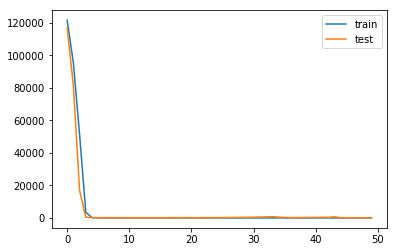

In [166]:

# plot history
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [129]:
import pickle
# save the model to disk
filename = 'bi_axial_sigmaMax.sav'
#pickle.dump(model, open(filename, 'wb'))


In [130]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [131]:
y_pred=loaded_model.predict(test_X)

In [132]:
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print('Test RMSE : %.3f' % rmse)

Test RMSE : 3.759


### plot actual vs prediction

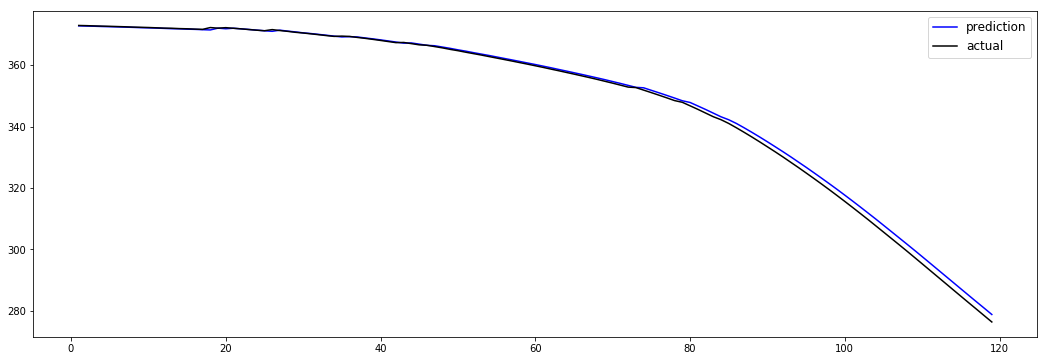

In [133]:
# plot
plt.figure(figsize=(18,6))
plt.plot([x for x in range(1,120)], y_pred[1:120], linestyle='-', color='blue', label='prediction')
plt.plot([x for x in range(1,120)], test_y[1:120], linestyle='-', color='black', label='actual')
plt.legend(loc=1, prop={'size': 12})
plt.show()



## Prediction part

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import load_model

In [135]:
import pickle
# save the model to disk
filename = 'bi_axial_sigmaMax.sav'
loaded_model = pickle.load(open(filename, 'rb'))

## Read Data

In [164]:
## Read Data
test=pd.read_excel('file_name.xlsx')
test=test.iloc[:,0:5]

In [ ]:
test['sig_equ']=np.sqrt((test['sig11']**2)+(3*(test['sig12']**2)))


In [ ]:
test['sig_max']=0
test['number_of _cycle']=0
count=0
time=0
for i in range(1,len(test)-1):
  if test.iloc[i,5]>test.iloc[i+1,5] and test.iloc[i,5] > test.iloc[i-1,5] and test.iloc[i,5] > 0 and (test.iloc[i,0]-time)>=40 :
    count+=1
    time=bi1.iloc[i,0]
    test.iloc[i,6]=1
    test.iloc[i,7]=count
    
    
new_test=pd.DataFrame(columns=['Time','number_of_cycle','eto11','sig11','eto12','sig12','sig_eq'])
for i in range(len(test)):
  if test.iloc[i,6]==1:
    new_test.loc[i,'Time']=test.iloc[i,0]
    new_test.loc[i,'eto11']=test.iloc[i,1]
    new_test.loc[i,'sig11']=test.iloc[i,2]
    new_test.loc[i,'eto12']=test.iloc[i,3]
    new_test.loc[i,'sig12']=test.iloc[i,4]
    new_test.loc[i,'sig_eq']=test.iloc[i,5]
    new_test.loc[i,'number_of_cycle']=test.iloc[i,7]
    
    



In [ ]:
data=pd.DataFrame(columns=['number_of_cycle','eto11','eto12','sig_eq'])
data['number_of_cycle']=new_test.iloc[:,1]
data['eto11']=new_test.iloc[:,2]
data['eto12']=new_test.iloc[:,4]
data['sig_eq']=new_test.iloc[:,6]



In [169]:
 def prepare_data(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN valuestype(new_uni4.iloc[1,2])
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [170]:
data = prepare_data(data.iloc[:,1:].values, 1, 1)


In [ ]:
n_mins=5
n_features=1
values = data.values
n_obs = n_mins * n_features
test_X,  test_y =values[:, :n_obs], values[:,-1]
test_X = test_X.reshape((test_X.shape[0], n_mins, n_features))
test_y=test_y.reshape(-1,1)


In [172]:
y_pred=loaded_model.predict(test_X)

In [ ]:
y_pred

In [ ]:
# plot
plt.figure(figsize=(18,6))
plt.plot([x for x in range(1,y_pred.shape[0]+1)], y_pred, linestyle='-', color='blue', label='prediction')
plt.plot([x for x in range(1,test_y.shape[0]+1)], test_y, linestyle='-', color='black', label='actual')
plt.legend(loc=1, prop={'size': 12})
plt.show()

